### Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import pandas as pd

# Încarcă seturile de date
red_wine = pd.read_csv('winequality-red.csv', sep=';')

# Adaugă coloana 'type'
red_wine['type'] = 'red'

red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [3]:
white_wine = pd.read_csv('winequality-white.csv', sep=';')

white_wine['type'] = 'white'

white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [4]:
# Combinați cele două seturi de date
# ignore_index = True pt a reseta indicii
wine_data = pd.concat([red_wine, white_wine], ignore_index=True)

# Verifică structura datelor combinate
print("Dimensiune set combinat:", wine_data.shape)
print("\nPrimele 5 înregistrări:")
display(wine_data.head())
print("\nUltimele 5 înregistrări:")
display(wine_data.tail())

# Salvează setul de date combinat într-un fișier CSV
wine_data.to_csv('wine_data_combined.csv', index=False)
print("\nSetul de date combinat a fost salvat în 'wine_data_combined.csv'")

Dimensiune set combinat: (6497, 13)

Primele 5 înregistrări:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red



Ultimele 5 înregistrări:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white



Setul de date combinat a fost salvat în 'wine_data_combined.csv'


In [5]:
wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [6]:
# Verifică distribuția tipurilor
print("\nDistribuția tipurilor de vin:")
print(wine_data['type'].value_counts())

# Verifică dacă toate coloanele sunt prezente
print("\nColoanele finale:", wine_data.columns.tolist())


Distribuția tipurilor de vin:
type
white    4898
red      1599
Name: count, dtype: int64

Coloanele finale: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'type']


In [7]:
wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


Saving figure attribute_histogram_plots


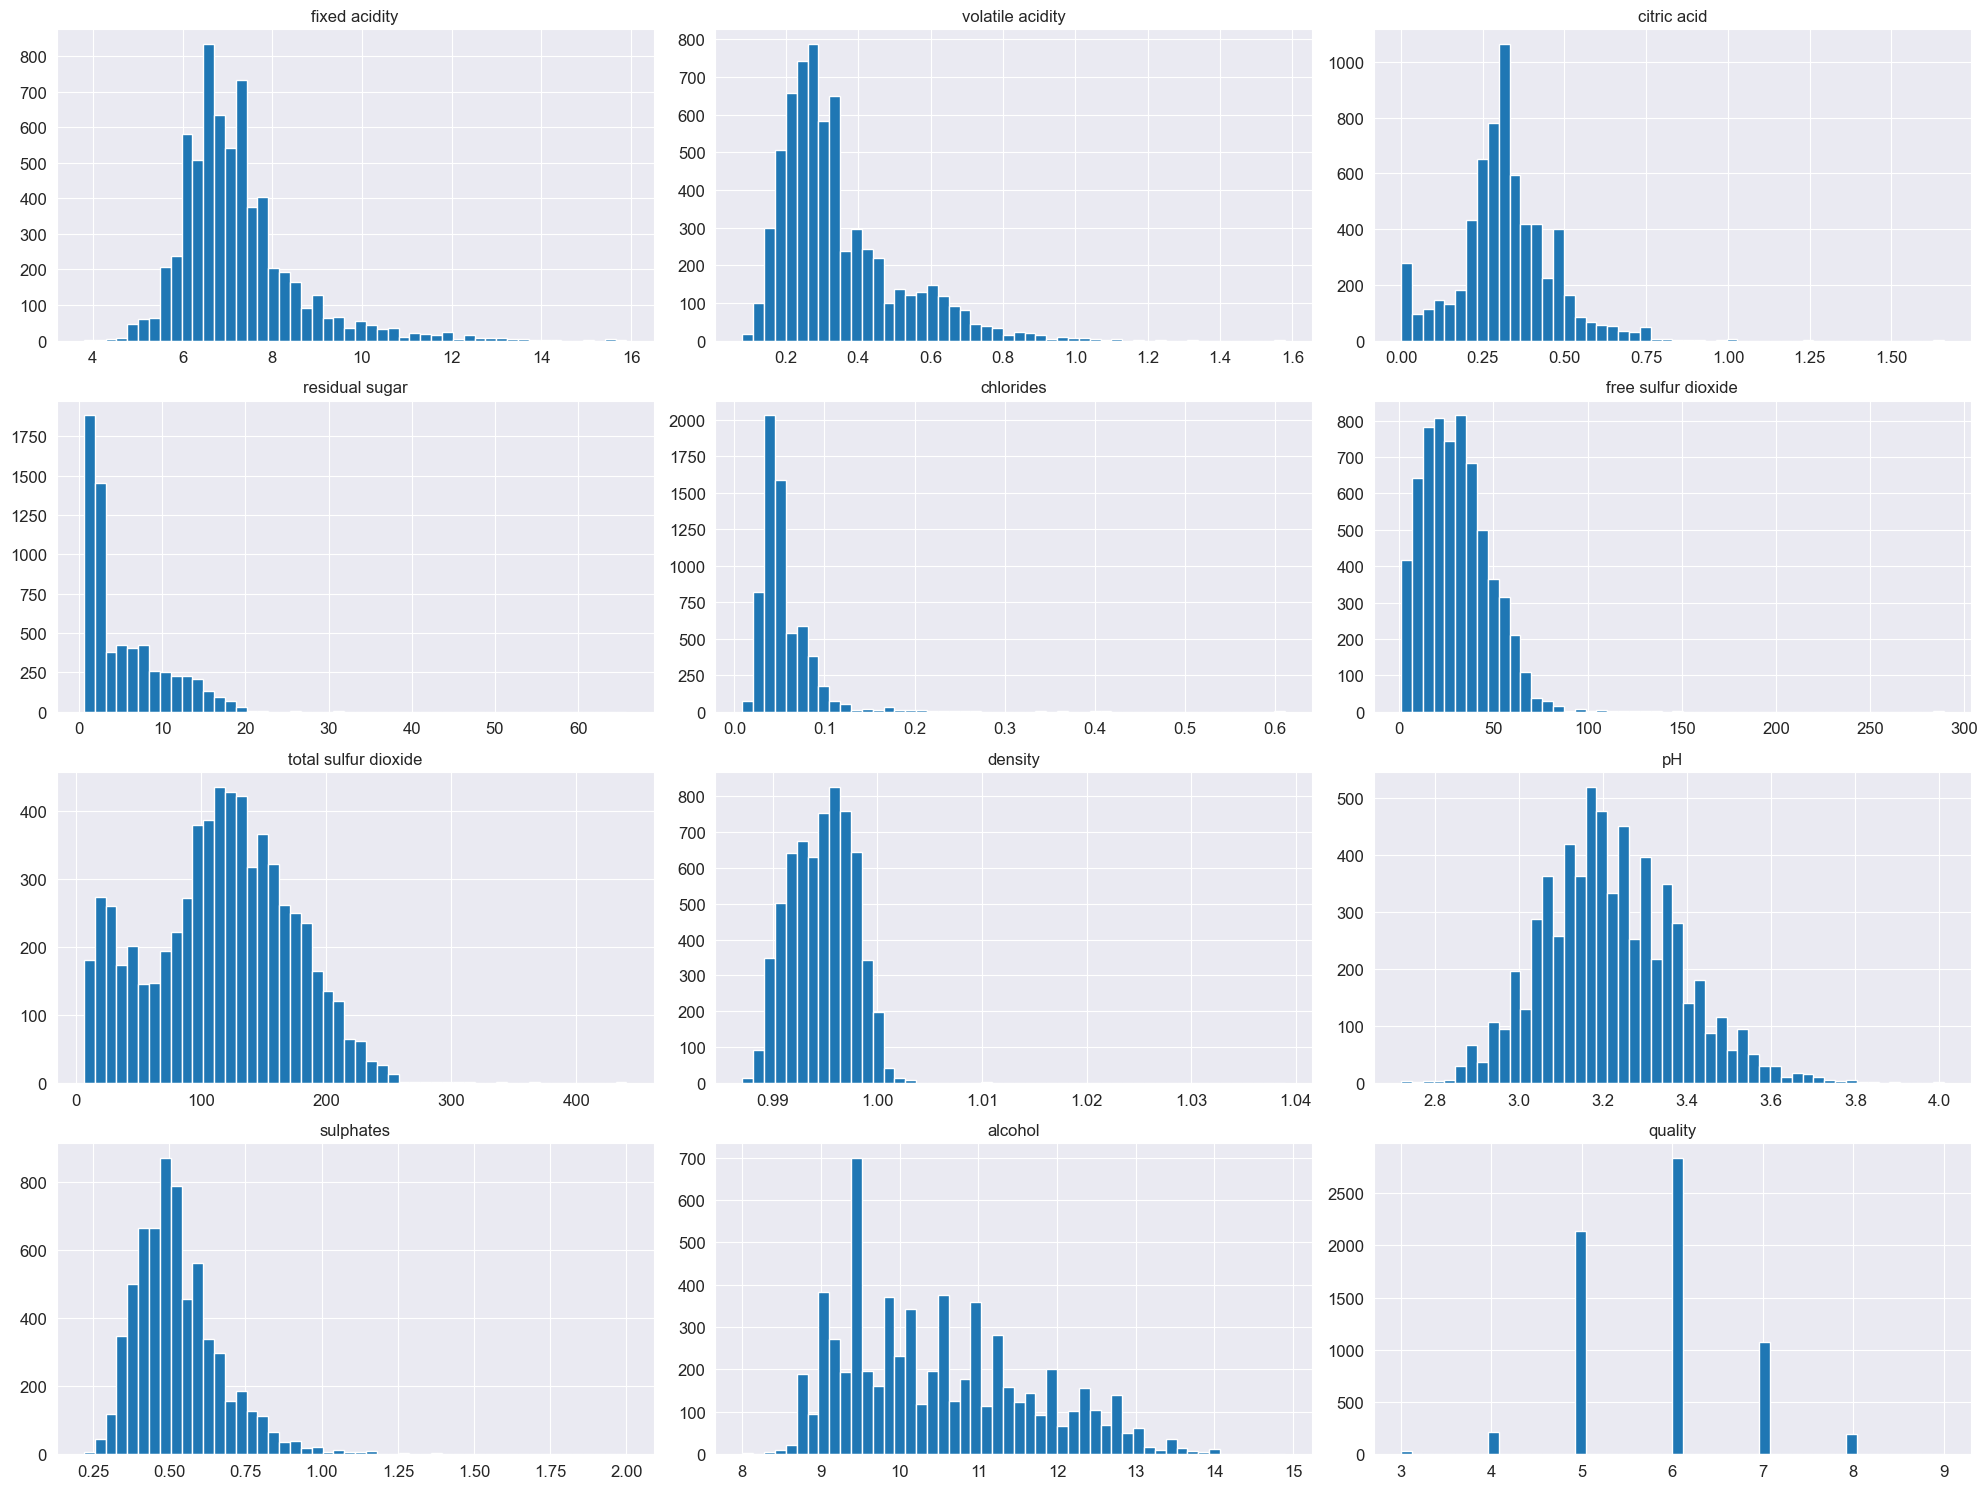

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
wine_data.hist(bins=50, figsize=(20,15))
save_fig("attribute_histogram_plots")
plt.show()

### 1. Analiza Preliminară a Setului Combinat

In [9]:
print("\nValori lipsă în setul combinat:")
print(wine_data.isnull().sum())

# Verificare duplicate
print("\nNumăr de duplicate:", wine_data.duplicated().sum())


Valori lipsă în setul combinat:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

Număr de duplicate: 1177


### 2. Analiza Distribuției Calității

Saving figure quality_distribution_by_type


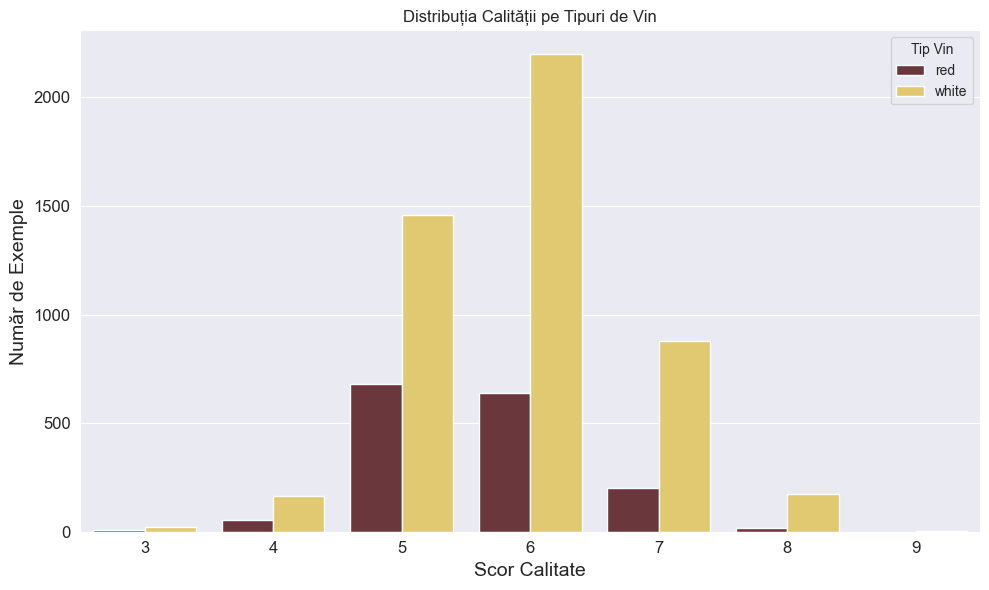

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='quality', hue='type', data=wine_data, palette={'red': '#722f37', 'white': '#f4d35e'})
plt.title('Distribuția Calității pe Tipuri de Vin')
plt.xlabel('Scor Calitate')
plt.ylabel('Număr de Exemple')
plt.legend(title='Tip Vin')
save_fig('quality_distribution_by_type')
plt.show()

### 3. Comparație Statistici Descriptive pe Tipuri

In [11]:
# Separare date pe tipuri
red_stats = wine_data[wine_data['type'] == 'red'].describe().transpose()
white_stats = wine_data[wine_data['type'] == 'white'].describe().transpose()

# Adăugare diferențe relative
comparison = pd.concat([
    red_stats.add_prefix('red_'),
    white_stats.add_prefix('white_'),
    ((white_stats - red_stats)/red_stats * 100).add_prefix('diff_%_')
], axis=1)

display(comparison.round(2).head(13))

,red_count,red_mean,red_std,red_min,red_25%,red_50%,red_75%,red_max,white_count,white_mean,...,white_75%,white_max,diff_%_count,diff_%_mean,diff_%_std,diff_%_min,diff_%_25%,diff_%_50%,diff_%_75%,diff_%_max
fixed acidity,1599.0,8.32,1.74,4.60,7.10,7.90,9.20,15.90,4898.0,6.85,...,7.30,14.20,206.32,-17.61,-51.53,-17.39,-11.27,-13.92,-20.65,-10.69
volatile acidity,1599.0,0.53,0.18,0.12,0.39,0.52,0.64,1.58,4898.0,0.28,...,0.32,1.10,206.32,-47.28,-43.71,-33.33,-46.15,-50.00,-50.00,-30.38
citric acid,1599.0,0.27,0.19,0.00,0.09,0.26,0.42,1.00,4898.0,0.33,...,0.39,1.66,206.32,23.33,-37.88,NaN,200.00,23.08,-7.14,66.00
residual sugar,1599.0,2.54,1.41,0.90,1.90,2.20,2.60,15.50,4898.0,6.39,...,9.90,65.80,206.32,151.75,259.74,-33.33,-10.53,136.36,280.77,324.52
chlorides,1599.0,0.09,0.05,0.01,0.07,0.08,0.09,0.61,4898.0,0.05,...,0.05,0.35,206.32,-47.67,-53.58,-25.00,-48.57,-45.57,-44.44,-43.37
free sulfur dioxide,1599.0,15.87,10.46,1.00,7.00,14.00,21.00,72.00,4898.0,35.31,...,46.00,289.00,206.32,122.41,62.59,100.00,228.57,142.86,119.05,301.39
total sulfur dioxide,1599.0,46.47,32.90,6.00,22.00,38.00,62.00,289.00,4898.0,138.36,...,167.00,440.00,206.32,197.76,29.19,50.00,390.91,252.63,169.35,52.25
density,1599.0,1.00,0.00,0.99,1.00,1.00,1.00,1.00,4898.0,0.99,...,1.00,1.04,206.32,-0.27,58.47,-0.30,-0.39,-0.30,-0.17,3.52
pH,1599.0,3.31,0.15,2.74,3.21,3.31,3.40,4.01,4898.0,3.19,...,3.28,3.82,206.32,-3.71,-2.19,-0.73,-3.74,-3.93,-3.53,-4.74
sulphates,1599.0,0.66,0.17,0.33,0.55,0.62,0.73,2.00,4898.0,0.49,...,0.55,1.08,206.32,-25.57,-32.67,-33.33,-25.45,-24.19,-24.66,-46.00


### 4. Vizualizare Distribuții Feature-uri

Saving figure feature_distributions_by_type


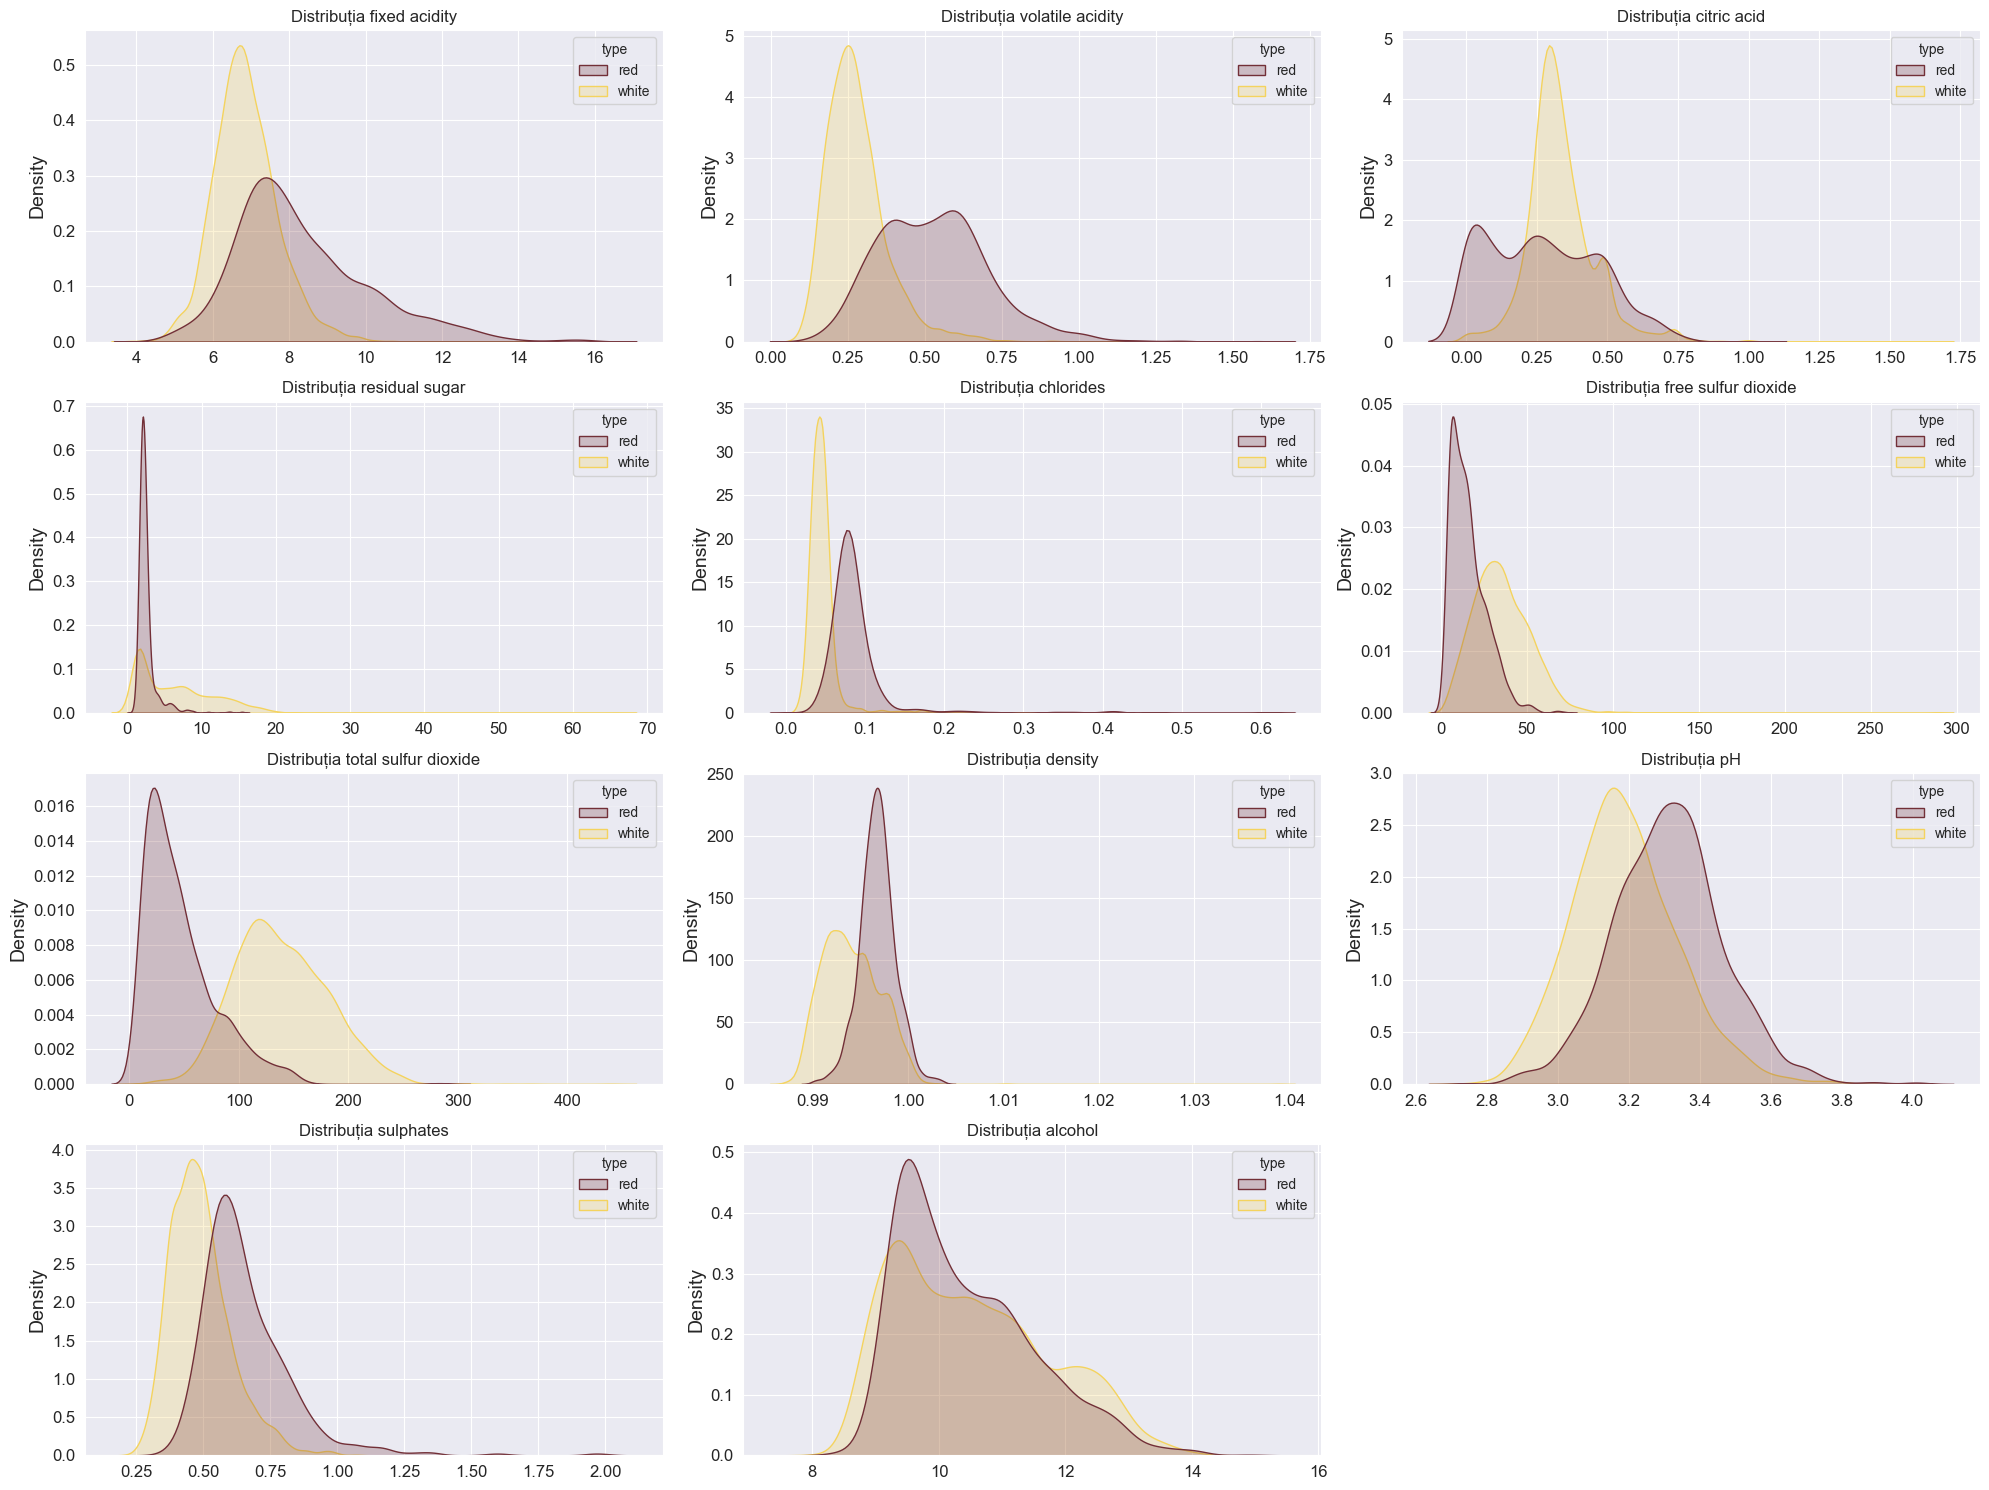

In [12]:
features = wine_data.columns[:-2]  # Excludem 'quality' și 'type'

plt.figure(figsize=(20, 15))
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)
    # kdeplot pt a vizualiza distribuția de densitate pt fiecare atribut
    # common_norm=False permite ca densitățile să fie normalizate separat, astfel încât ambele distribuții sunt vizibile chiar dacă un tip de vin are mult mai multe exemple
    sns.kdeplot(data=wine_data, x=feature, hue='type',
               palette={'red': '#722f37', 'white': '#f4d35e'},
               fill=True, common_norm=False)
    plt.title(f'Distribuția {feature}')
    plt.xlabel('')

plt.tight_layout()
save_fig('feature_distributions_by_type')
plt.show()

### 5. Analiza Corelațiilor


Saving figure global_correlation_heatmap


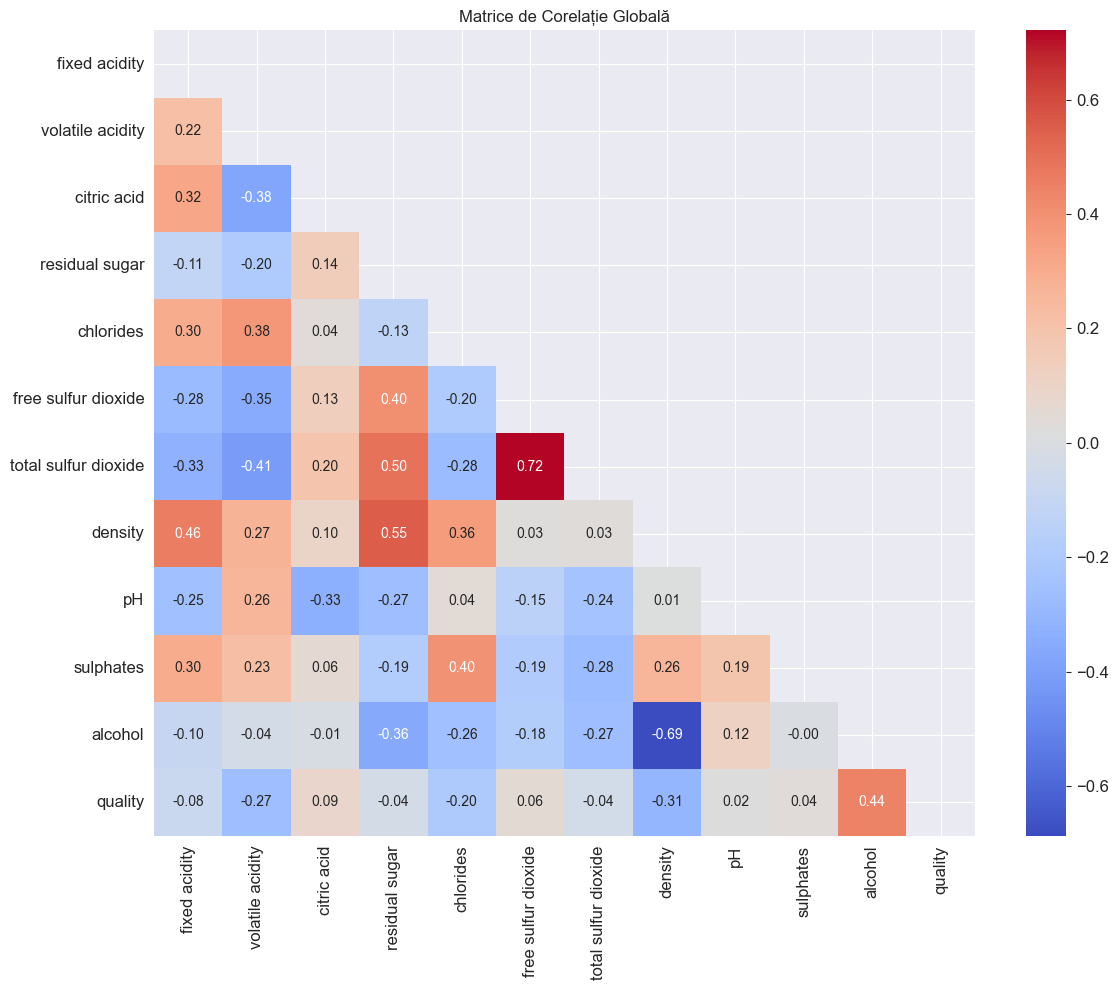

Saving figure correlation_by_wine_type


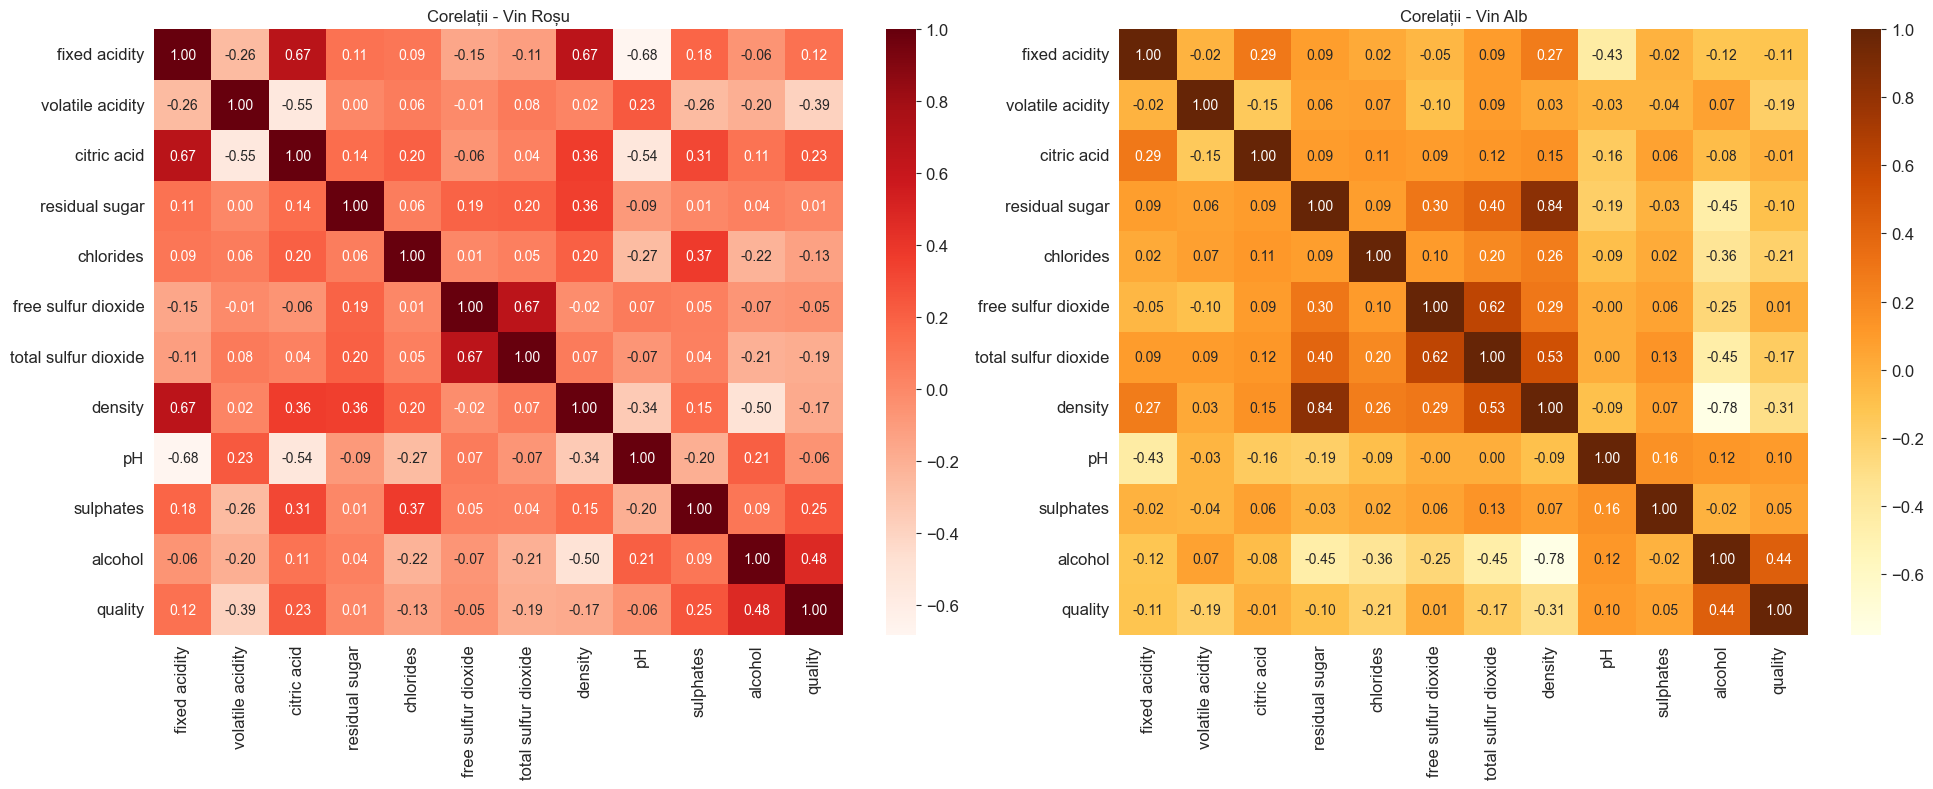

In [13]:
# Corelații globale
# corelațiile generale pentru toate vinurile, folosind coolwarm pentru a evidenția corelațiile pozitive (roșu) și negative (albastru)
# 1	    Corelație pozitivă perfectă (cresc împreună proporțional)
# 0	    Fără corelație liniară
# -1	Corelație negativă perfectă (o variabilă crește când cealaltă scade)

plt.figure(figsize=(12, 10))
corr_matrix = wine_data.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=np.triu(corr_matrix))
plt.title('Matrice de Corelație Globală')
save_fig('global_correlation_heatmap')
plt.show()

# Corelații diferențiate pe tipuri
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Vin roșu
sns.heatmap(wine_data[wine_data['type'] == 'red'].corr(numeric_only=True),
            ax=axes[0], annot=True, fmt=".2f", cmap='Reds')
axes[0].set_title('Corelații - Vin Roșu')

# Vin alb
sns.heatmap(wine_data[wine_data['type'] == 'white'].corr(numeric_only=True),
            ax=axes[1], annot=True, fmt=".2f", cmap='YlOrBr')
axes[1].set_title('Corelații - Vin Alb')

plt.tight_layout()
save_fig('correlation_by_wine_type')
plt.show()

### 6. Analiza Interacțiunilor între Feature-uri


Saving figure feature_interactions_pairplot


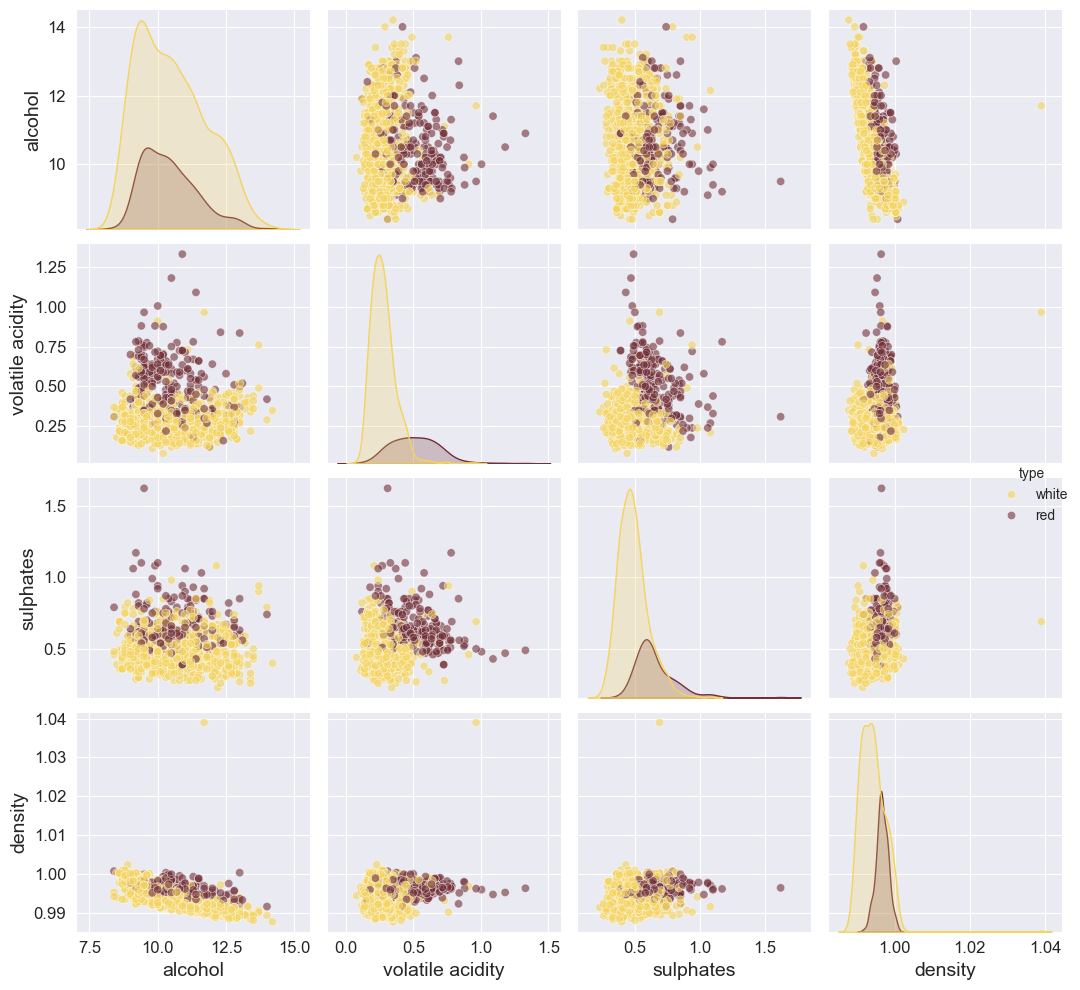

In [14]:
sns.pairplot(wine_data.sample(1000), vars=['alcohol', 'volatile acidity', 'sulphates', 'density'],
             hue='type', palette={'red': '#722f37', 'white': '#f4d35e'},
             plot_kws={'alpha': 0.6})
save_fig('feature_interactions_pairplot')
plt.show()

# Detectezi clustere naturale
# Observi diferențele de distribuție între vinurile roșii și albe

### 7. Analiza Calității vs. Componente Cheie

Saving figure quality_vs_key_features


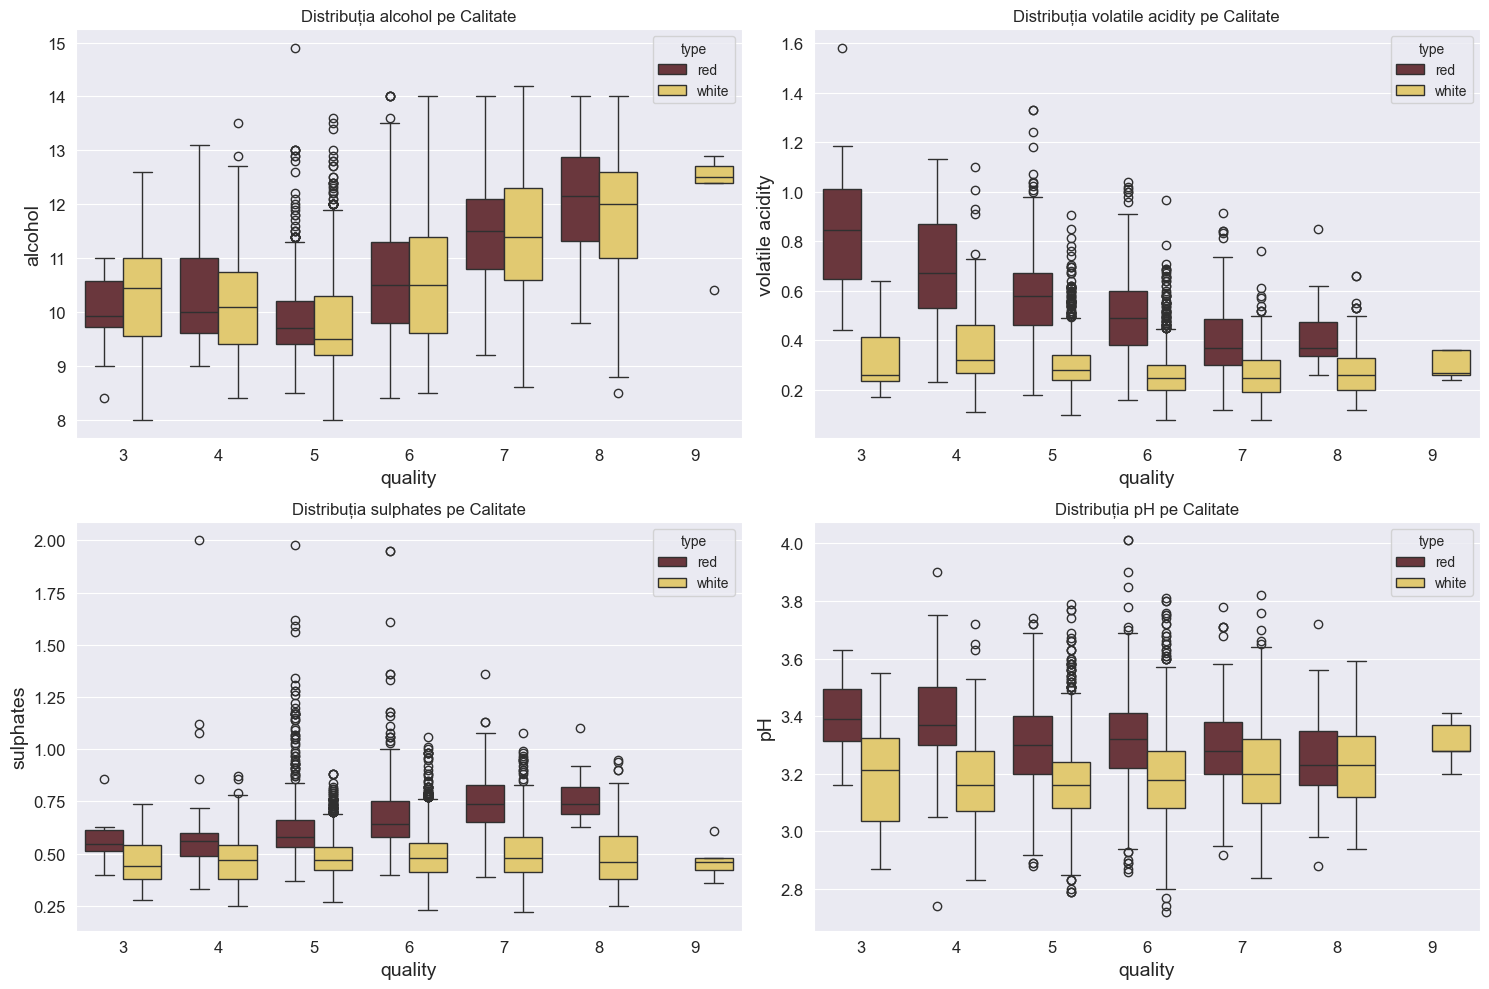

In [15]:
key_features = ['alcohol', 'volatile acidity', 'sulphates', 'pH']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(key_features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='quality', y=feature, hue='type', data=wine_data,
                palette={'red': '#722f37', 'white': '#f4d35e'})
    plt.title(f'Distribuția {feature} pe Calitate')

plt.tight_layout()
save_fig('quality_vs_key_features')
plt.show()

# Cum variază fiecare proprietate chimică în funcție de calitatea vinului
# - alcoolul crește cu calitatea
# - aciditatea volatilă scade cu calitatea
# - sulfatul crește usor cu calitatea, Vinurile roșii au un conținut de sulfați mai mare și mai variabil
# - ph relativ constat

Partea 2

### Split the data

In [16]:
from sklearn.model_selection import train_test_split

# Separăm caracteristicile (X) și variabila țintă (y)
X = wine_data.drop(['quality', 'type'], axis=1)  # Extragem toate caracteristicile chimice
y_quality = wine_data['quality']  # Target pentru predicția calității
y_type = wine_data['type']  # Target pentru clasificarea tipului de vin

# Amestecăm și împărțim datele în set de antrenare (80%) și testare (20%)
X_train, X_test, y_quality_train, y_quality_test, y_type_train, y_type_test = train_test_split(
    X, y_quality, y_type, test_size=0.2, random_state=42, stratify=y_quality, shuffle=True
)

# Afișăm dimensiunile seturilor de date
print(f"Set complet: {wine_data.shape[0]} exemple")
print(f"Set de antrenare: {X_train.shape[0]} exemple ({X_train.shape[0]/wine_data.shape[0]:.1%})")
print(f"Set de testare: {X_test.shape[0]} exemple ({X_test.shape[0]/wine_data.shape[0]:.1%})")

# Verificăm distribuția claselor în seturile de date pentru calitate
print("\nDistribuția claselor de calitate:")
print("Antrenare:", pd.Series(y_quality_train).value_counts().sort_index().to_dict())
print("Testare:", pd.Series(y_quality_test).value_counts().sort_index().to_dict())

# Verificăm distribuția tipurilor de vin în seturile de date
print("\nDistribuția tipurilor de vin:")
print("Antrenare:", pd.Series(y_type_train).value_counts().to_dict())
print("Testare:", pd.Series(y_type_test).value_counts().to_dict())

Set complet: 6497 exemple
Set de antrenare: 5197 exemple (80.0%)
Set de testare: 1300 exemple (20.0%)

Distribuția claselor de calitate:
Antrenare: {3: 24, 4: 173, 5: 1710, 6: 2269, 7: 863, 8: 154, 9: 4}
Testare: {3: 6, 4: 43, 5: 428, 6: 567, 7: 216, 8: 39, 9: 1}

Distribuția tipurilor de vin:
Antrenare: {'white': 3904, 'red': 1293}
Testare: {'white': 994, 'red': 306}


Pregatirea datelor pentru modelare

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Standardizăm caracteristicile pentru îmbunătățirea performanței modelelor
# Fără standardizare, caracteristicile cu valori numerice mai mari ar putea influența disproporționat modelul.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirmăm forma datelor
print("Forma X_train_scaled:", X_train_scaled.shape)
print("Forma X_test_scaled:", X_test_scaled.shape)
print("Forma y_quality_train:", y_quality_train.shape)
print("Forma y_quality_test:", y_quality_test.shape)

Forma X_train_scaled: (5197, 11)
Forma X_test_scaled: (1300, 11)
Forma y_quality_train: (5197,)
Forma y_quality_test: (1300,)


SVM

Implementăm SVM pentru predicția calității vinului...
Efectuăm căutarea parametrilor optimali...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Cea mai bună configurație de parametri: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cea mai bună acuratețe în timpul validării: 0.5844
Timp total de căutare: 21.31 secunde

Acuratețe pe setul de test: 0.5908
F1-score (weighted) pe setul de test: 0.5753

Raport de clasificare detaliat:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.18      0.07      0.10        43
           5       0.63      0.62      0.62       428
           6       0.58      0.72      0.64       567
           7       0.57      0.41      0.48       216
           8       0.50      0.13      0.20        39
           9       0.00      0.00      0.00         1

    accuracy                           0.59      1300
   macro avg       0.35      0.28      0.29      1300
weighted avg  

c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


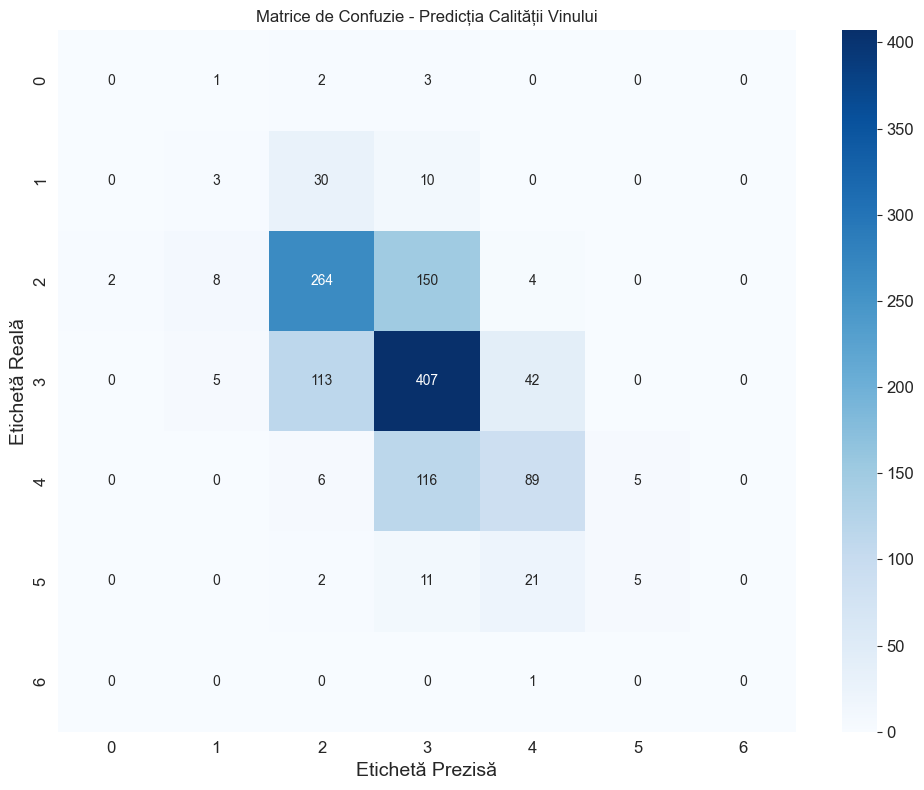

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score
from sklearn.model_selection import GridSearchCV, learning_curve
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Antrenăm modelul SVM pentru predicția calității vinului
print("Implementăm SVM pentru predicția calității vinului...")

# Definim parametrii pentru GridSearchCV
param_grid = {
    'C': [1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'linear']
}

# Inițializăm modelul SVM
svm = SVC(random_state=42)

# Folosim GridSearchCV pentru a găsi cei mai buni hiperparametri
print("Efectuăm căutarea parametrilor optimali...")
start_time = time.time()
grid_search = GridSearchCV(svm, param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_quality_train)
end_time = time.time()

# Afișăm rezultatele
print(f"Cea mai bună configurație de parametri: {grid_search.best_params_}")
print(f"Cea mai bună acuratețe în timpul validării: {grid_search.best_score_:.4f}")
print(f"Timp total de căutare: {end_time - start_time:.2f} secunde")

# Extragem modelul optim și evaluăm pe setul de test
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test_scaled)

# Calculăm metricile de performanță
accuracy = accuracy_score(y_quality_test, y_pred)
f1 = f1_score(y_quality_test, y_pred, average='weighted')

print(f"\nAcuratețe pe setul de test: {accuracy:.4f}")
print(f"F1-score (weighted) pe setul de test: {f1:.4f}")
print("\nRaport de clasificare detaliat:")
print(classification_report(y_quality_test, y_pred))

# Afișăm matricea de confuzie
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_quality_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de Confuzie - Predicția Calității Vinului')
plt.ylabel('Etichetă Reală')
plt.xlabel('Etichetă Prezisă')
save_fig('svm_wine_quality_confusion_matrix')
plt.show()

Saving figure svm_wine_quality_learning_curve


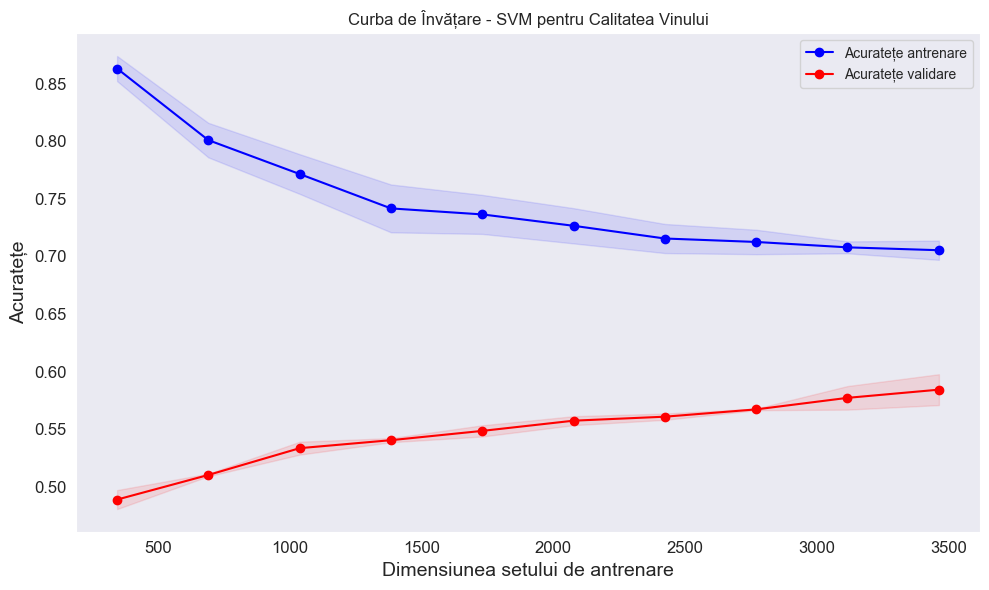

In [19]:
# Analizăm curbele de învățare pentru a înțelege tendințele de overfitting/underfitting
def plot_learning_curves(estimator, X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Calculăm curbele de învățare pentru acuratețe
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=3, scoring='accuracy', n_jobs=-1)

    # Calculăm media și deviația standard pentru scorurile de antrenare și validare
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    validation_mean = np.mean(validation_scores, axis=1)
    validation_std = np.std(validation_scores, axis=1)

    # Plotăm acuratețea
    plt.figure(figsize=(10, 6))
    plt.title('Curba de Învățare - SVM pentru Calitatea Vinului')
    plt.xlabel('Dimensiunea setului de antrenare')
    plt.ylabel('Acuratețe')
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='red')

    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Acuratețe antrenare')
    plt.plot(train_sizes, validation_mean, 'o-', color='red', label='Acuratețe validare')

    plt.legend(loc='best')
    save_fig('svm_wine_quality_learning_curve')
    plt.show()

# Plotăm curba de învățare pentru cel mai bun model SVM
plot_learning_curves(best_svm, X_train_scaled, y_quality_train)

Saving figure svm_hyperparameters_effect


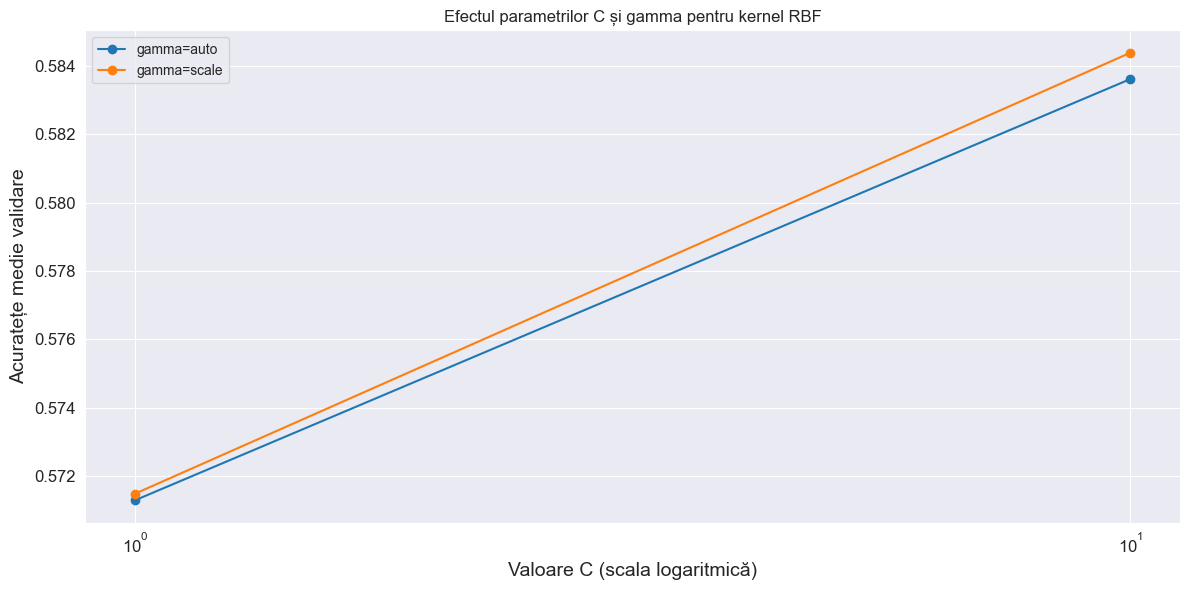

Saving figure svm_kernel_comparison


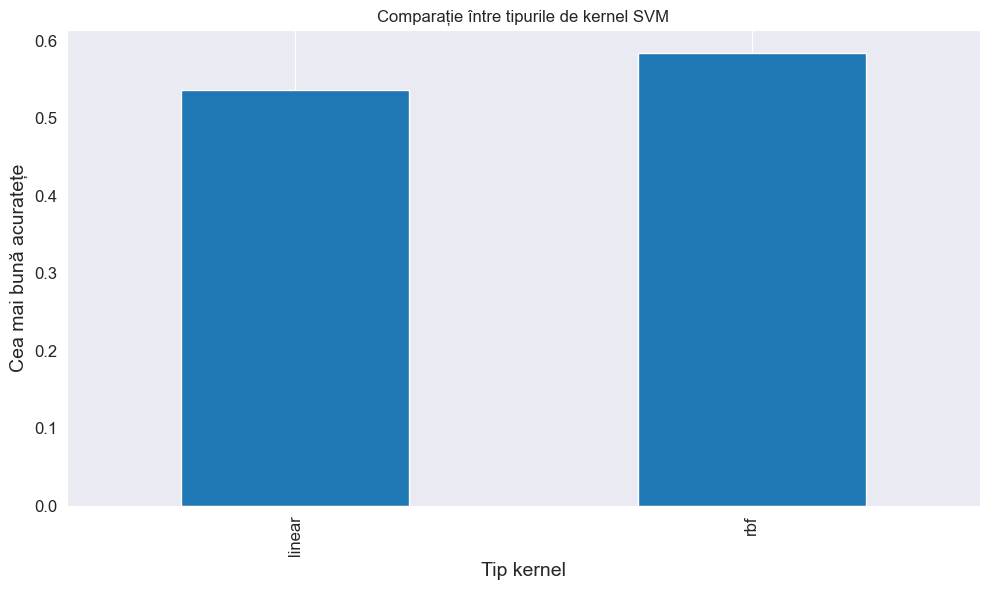

In [20]:
# Extragem rezultatele din GridSearchCV pentru a vizualiza efectul hiperparametrilor
results = grid_search.cv_results_

# Creăm un DataFrame pentru o analiză mai ușoară
import pandas as pd
results_df = pd.DataFrame(results)

# Analizăm efectul parametrului C pentru kernel RBF
rbf_results = results_df[results_df['param_kernel'] == 'rbf'].sort_values('param_C')

plt.figure(figsize=(12, 6))
for gamma, group in rbf_results.groupby('param_gamma'):
    plt.plot(group['param_C'], group['mean_test_score'], 'o-', label=f'gamma={gamma}')

plt.xscale('log')
plt.xlabel('Valoare C (scala logaritmică)')
plt.ylabel('Acuratețe medie validare')
plt.title('Efectul parametrilor C și gamma pentru kernel RBF')
plt.legend()
plt.grid(True)
save_fig('svm_hyperparameters_effect')
plt.show()

# Comparăm performanța între diferite tipuri de kernel
plt.figure(figsize=(10, 6))
kernel_comparison = results_df.groupby('param_kernel')['mean_test_score'].max()
kernel_comparison.plot(kind='bar')
plt.xlabel('Tip kernel')
plt.ylabel('Cea mai bună acuratețe')
plt.title('Comparație între tipurile de kernel SVM')
plt.grid(axis='y')
save_fig('svm_kernel_comparison')
plt.show()

In [21]:
# Analizăm performanța folosind doar cele mai relevante caracteristici
# Pe baza analizei anterioare, selectăm caracteristicile importante
from sklearn.feature_selection import SelectKBest, f_classif

# Selectăm cele mai bune k caracteristici
selector = SelectKBest(f_classif, k=5)
X_train_selected = selector.fit_transform(X_train_scaled, y_quality_train)
X_test_selected = selector.transform(X_test_scaled)

# Vedem care sunt caracteristicile selectate
feature_indices = selector.get_support(indices=True)
selected_features = X.columns[feature_indices]
print("Caracteristici selectate:", selected_features.tolist())

# Antrenăm modelul SVM pe caracteristicile selectate
best_params = grid_search.best_params_
svm_selected = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'], random_state=42)
svm_selected.fit(X_train_selected, y_quality_train)

# Evaluăm performanța
y_pred_selected = svm_selected.predict(X_test_selected)
accuracy_selected = accuracy_score(y_quality_test, y_pred_selected)
f1_selected = f1_score(y_quality_test, y_pred_selected, average='weighted')

print(f"\nRezultate cu caracteristici selectate:")
print(f"Acuratețe: {accuracy_selected:.4f}")
print(f"F1-score (weighted): {f1_selected:.4f}")
print(f"Comparație cu modelul complet: {accuracy_selected - accuracy:.4f} diferență de acuratețe")

Caracteristici selectate: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']

Rezultate cu caracteristici selectate:
Acuratețe: 0.5554
F1-score (weighted): 0.5258
Comparație cu modelul complet: -0.0354 diferență de acuratețe


Decision Tree

Implementăm Decision Tree pentru predicția calității vinului...
Efectuăm căutarea parametrilor optimali...
Fitting 5 folds for each of 90 candidates, totalling 450 fits


c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cea mai bună configurație de parametri: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Cea mai bună acuratețe în timpul validării: 0.5857
Timp total de căutare: 20.54 secunde

Acuratețe pe setul de test: 0.6000
F1-score (weighted) pe setul de test: 0.5974
Log Loss pe setul de test: 13.9975

Raport de clasificare detaliat:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.23      0.19      0.21        43
           5       0.65      0.64      0.65       428
           6       0.63      0.63      0.63       567
           7       0.54      0.60      0.57       216
           8       0.35      0.28      0.31        39
           9       0.00      0.00      0.00         1

    accuracy                           0.60      1300
   macro avg       0.34      0.33      0.34      1300
weighted avg       0.60      0.60      0.60      1300



c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Saving figure dt_wine_quality_confusion_matrix


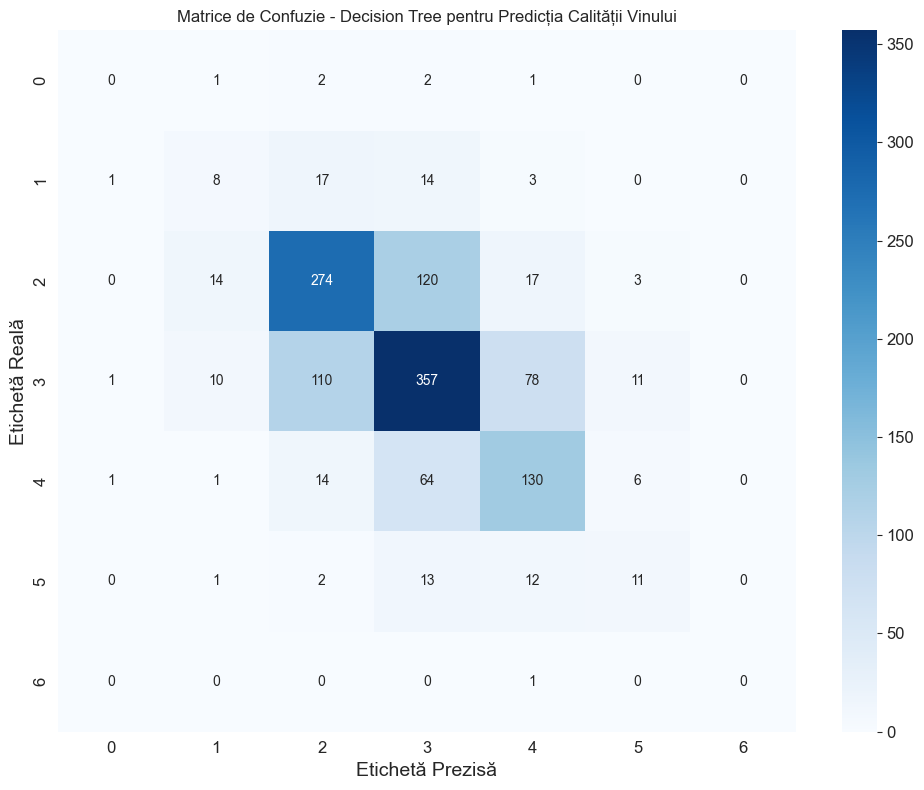

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, log_loss
from sklearn.model_selection import GridSearchCV, learning_curve
import time
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree

# Anunțăm implementarea modelului Decision Tree
print("Implementăm Decision Tree pentru predicția calității vinului...")

# Definim parametrii pentru GridSearchCV
param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Inițializăm modelul Decision Tree
dt_clf = DecisionTreeClassifier(random_state=42)

# Folosim GridSearchCV pentru a găsi cei mai buni hiperparametri
print("Efectuăm căutarea parametrilor optimali...")
start_time = time.time()
grid_search = GridSearchCV(dt_clf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_quality_train)
end_time = time.time()

# Afișăm rezultatele
print(f"Cea mai bună configurație de parametri: {grid_search.best_params_}")
print(f"Cea mai bună acuratețe în timpul validării: {grid_search.best_score_:.4f}")
print(f"Timp total de căutare: {end_time - start_time:.2f} secunde")

# Extragem modelul optim și evaluăm pe setul de test
best_dt = grid_search.best_estimator_
y_pred_dt = best_dt.predict(X_test_scaled)

# Calculăm probabilitățile pentru calculul loss-ului
y_pred_proba_dt = best_dt.predict_proba(X_test_scaled)

# Calculăm metricile de performanță
accuracy_dt = accuracy_score(y_quality_test, y_pred_dt)
f1_dt = f1_score(y_quality_test, y_pred_dt, average='weighted')
dt_loss = log_loss(y_quality_test, y_pred_proba_dt)

print(f"\nAcuratețe pe setul de test: {accuracy_dt:.4f}")
print(f"F1-score (weighted) pe setul de test: {f1_dt:.4f}")
print(f"Log Loss pe setul de test: {dt_loss:.4f}")
print("\nRaport de clasificare detaliat:")
print(classification_report(y_quality_test, y_pred_dt))

# Afișăm matricea de confuzie
plt.figure(figsize=(10, 8))
cm_dt = confusion_matrix(y_quality_test, y_pred_dt)
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de Confuzie - Decision Tree pentru Predicția Calității Vinului')
plt.ylabel('Etichetă Reală')
plt.xlabel('Etichetă Prezisă')
save_fig('dt_wine_quality_confusion_matrix')
plt.show()

c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Saving figure dt_accuracy_learning_curve


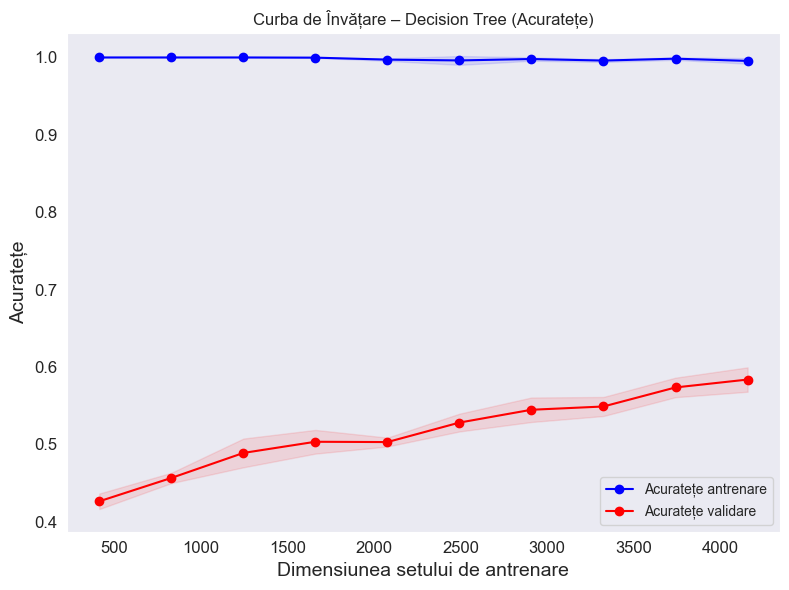

c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Saving figure dt_train_loss_curve


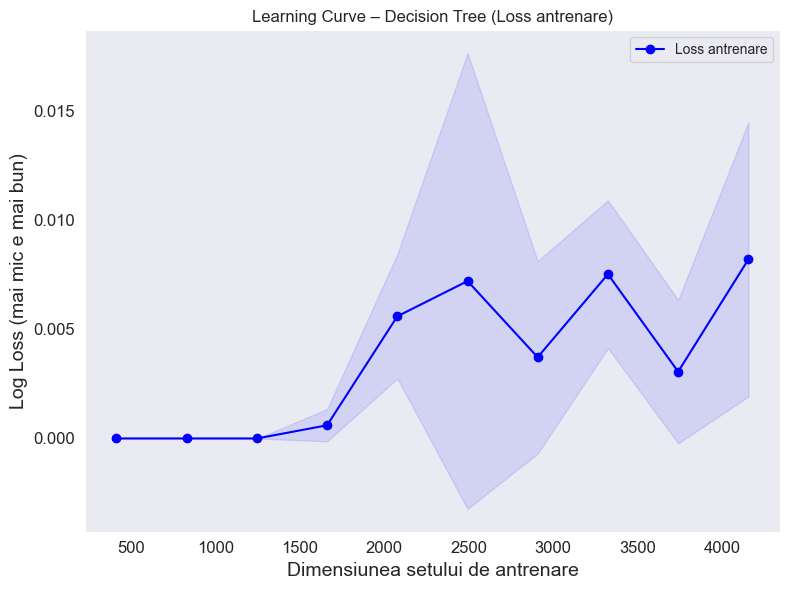

Saving figure dt_val_loss_curve


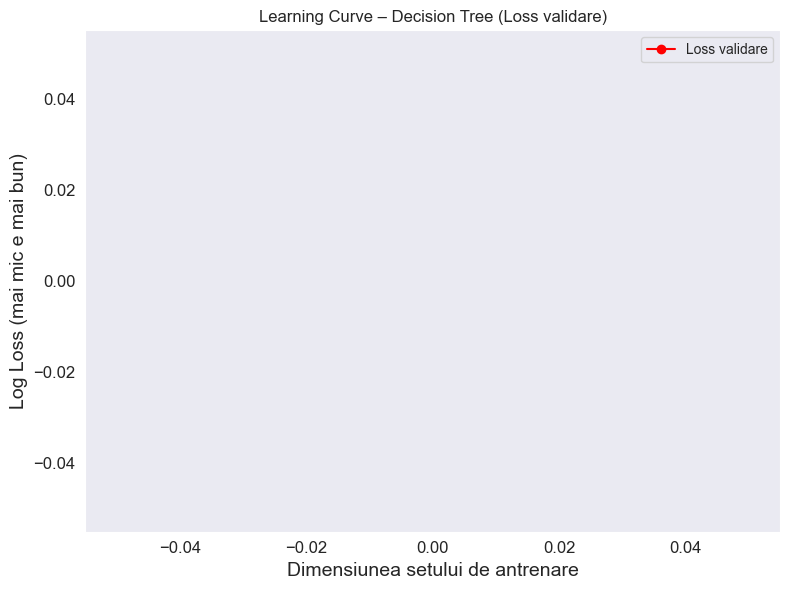

In [49]:
# Analizăm curbele de învățare pentru a înțelege tendințele de overfitting/underfitting
def plot_learning_curves_split_losses(estimator, X, y):
    train_sizes = np.linspace(0.1, 1.0, 10)

    # 1. Curba de acuratețe (antrenare + validare)
    ts, train_scores, val_scores = learning_curve(
        estimator, X, y,
        train_sizes=train_sizes, cv=5,
        scoring='accuracy', n_jobs=-1
    )
    train_mean  = np.mean(train_scores, axis=1)
    train_std   = np.std(train_scores, axis=1)
    val_mean    = np.mean(val_scores, axis=1)
    val_std     = np.std(val_scores, axis=1)

    plt.figure(figsize=(8, 6))
    plt.title('Curba de Învățare – Decision Tree (Acuratețe)')
    plt.xlabel('Dimensiunea setului de antrenare')
    plt.ylabel('Acuratețe')
    plt.grid()
    plt.fill_between(ts, train_mean-train_std, train_mean+train_std, alpha=0.1, color='blue')
    plt.fill_between(ts, val_mean-val_std,       val_mean+val_std,       alpha=0.1, color='red')
    plt.plot(ts, train_mean, 'o-', label='Acuratețe antrenare', color='blue')
    plt.plot(ts, val_mean,   'o-', label='Acuratețe validare',   color='red')
    plt.legend()
    plt.tight_layout()
    save_fig('dt_accuracy_learning_curve')
    plt.show()

    # 2. Pregătim datele de log‑loss
    ts_l, train_scores_l, val_scores_l = learning_curve(
        estimator, X, y,
        train_sizes=train_sizes, cv=5,
        scoring='neg_log_loss', n_jobs=-1
    )
    train_loss = -np.mean(train_scores_l, axis=1)
    train_std_l = np.std(-train_scores_l, axis=1)
    val_loss   = -np.mean(val_scores_l, axis=1)
    val_std_l  = np.std(-val_scores_l,   axis=1)

    # 3. Plot doar Loss antrenare
    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve – Decision Tree (Loss antrenare)')
    plt.xlabel('Dimensiunea setului de antrenare')
    plt.ylabel('Log Loss (mai mic e mai bun)')
    plt.grid()
    plt.fill_between(ts_l,
                     train_loss - train_std_l,
                     train_loss + train_std_l,
                     alpha=0.1, color='blue')
    plt.plot(ts_l, train_loss, 'o-', label='Loss antrenare', color='blue')
    plt.legend()
    plt.tight_layout()
    save_fig('dt_train_loss_curve')
    plt.show()

    # 4. Plot doar Loss validare
    plt.figure(figsize=(8, 6))
    plt.title('Learning Curve – Decision Tree (Loss validare)')
    plt.xlabel('Dimensiunea setului de antrenare')
    plt.ylabel('Log Loss (mai mic e mai bun)')
    plt.grid()
    plt.fill_between(ts_l,
                     val_loss - val_std_l,
                     val_loss + val_std_l,
                     alpha=0.1, color='red')
    plt.plot(ts_l, val_loss, 'o-', label='Loss validare', color='red')
    plt.legend()
    plt.tight_layout()
    save_fig('dt_val_loss_curve')
    plt.show()

# Plotăm curbele pentru cel mai bun model Decision Tree
plot_learning_curves_split_losses(best_dt, X_train_scaled, y_quality_train)

Saving figure dt_feature_importance


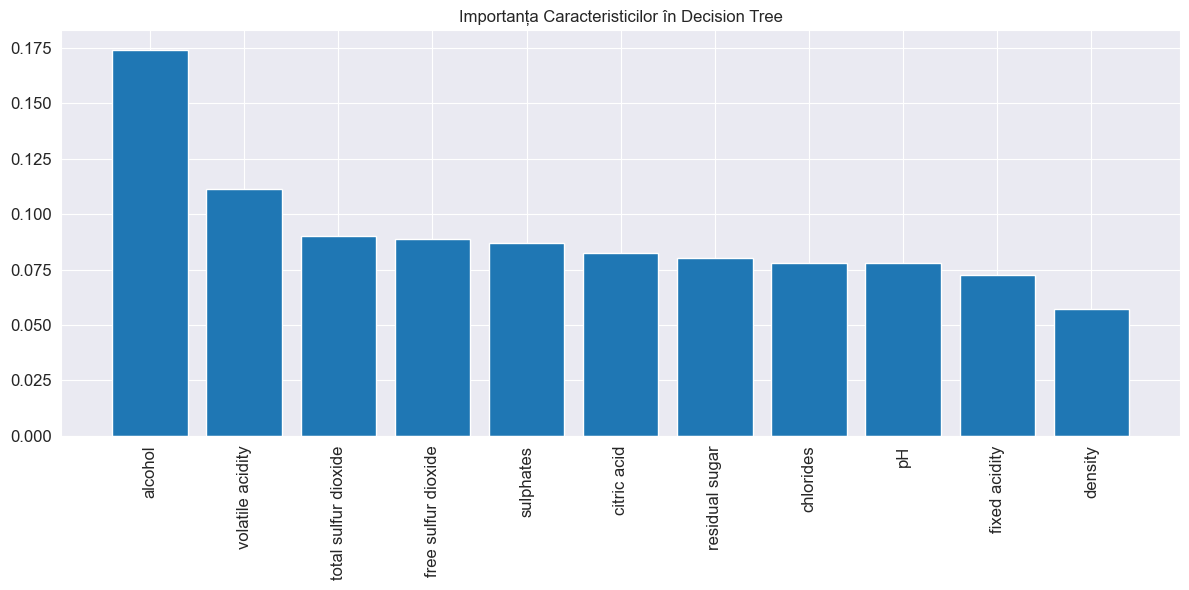

Arborele este prea complex pentru a fi vizualizat complet. Afișăm un arbore truncat la adâncimea 3:
Saving figure dt_simple_tree_visualization


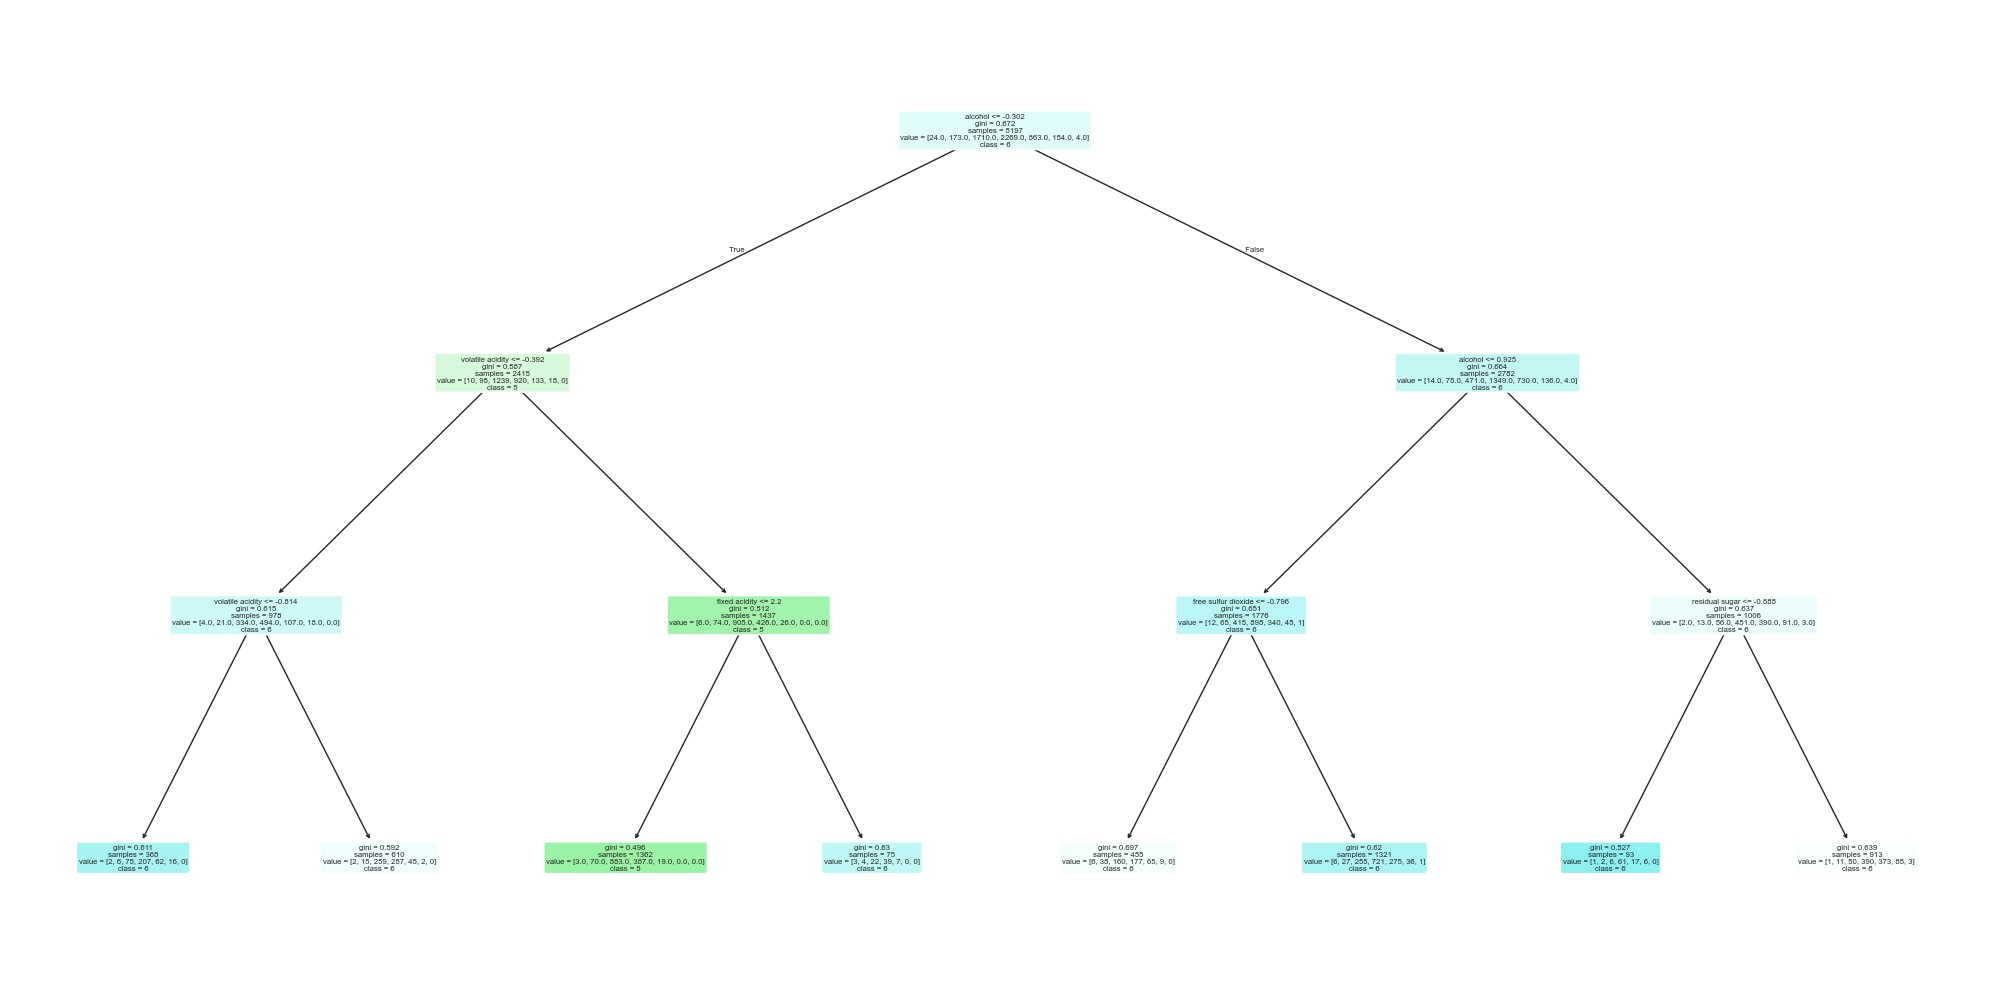

In [24]:
# Vizualizarea importanței caracteristicilor
plt.figure(figsize=(12, 6))
importances = best_dt.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.title('Importanța Caracteristicilor în Decision Tree')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
save_fig('dt_feature_importance')
plt.show()

# Vizualizarea arborelui (pentru un arbore mai mic)
if best_dt.max_depth is not None and best_dt.max_depth <= 5:
    plt.figure(figsize=(20, 10))
    tree.plot_tree(best_dt, feature_names=feature_names, filled=True, rounded=True, class_names=[str(i) for i in range(3, 10)])
    save_fig('dt_tree_visualization')
    plt.show()
else:
    print("Arborele este prea complex pentru a fi vizualizat complet. Afișăm un arbore truncat la adâncimea 3:")
    simple_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
    simple_dt.fit(X_train_scaled, y_quality_train)
    plt.figure(figsize=(20, 10))
    tree.plot_tree(simple_dt, feature_names=feature_names, filled=True, rounded=True, class_names=[str(i) for i in range(3, 10)])
    save_fig('dt_simple_tree_visualization')
    plt.show()


Rezultate Decision Tree cu caracteristici selectate:
Acuratețe: 0.6038
F1-score (weighted): 0.6039
Comparație cu modelul complet: 0.0038 diferență de acuratețe
Caracteristici utilizate: ['volatile acidity', 'chlorides', 'free sulfur dioxide', 'density', 'alcohol']
Saving figure dt_selected_features_tree


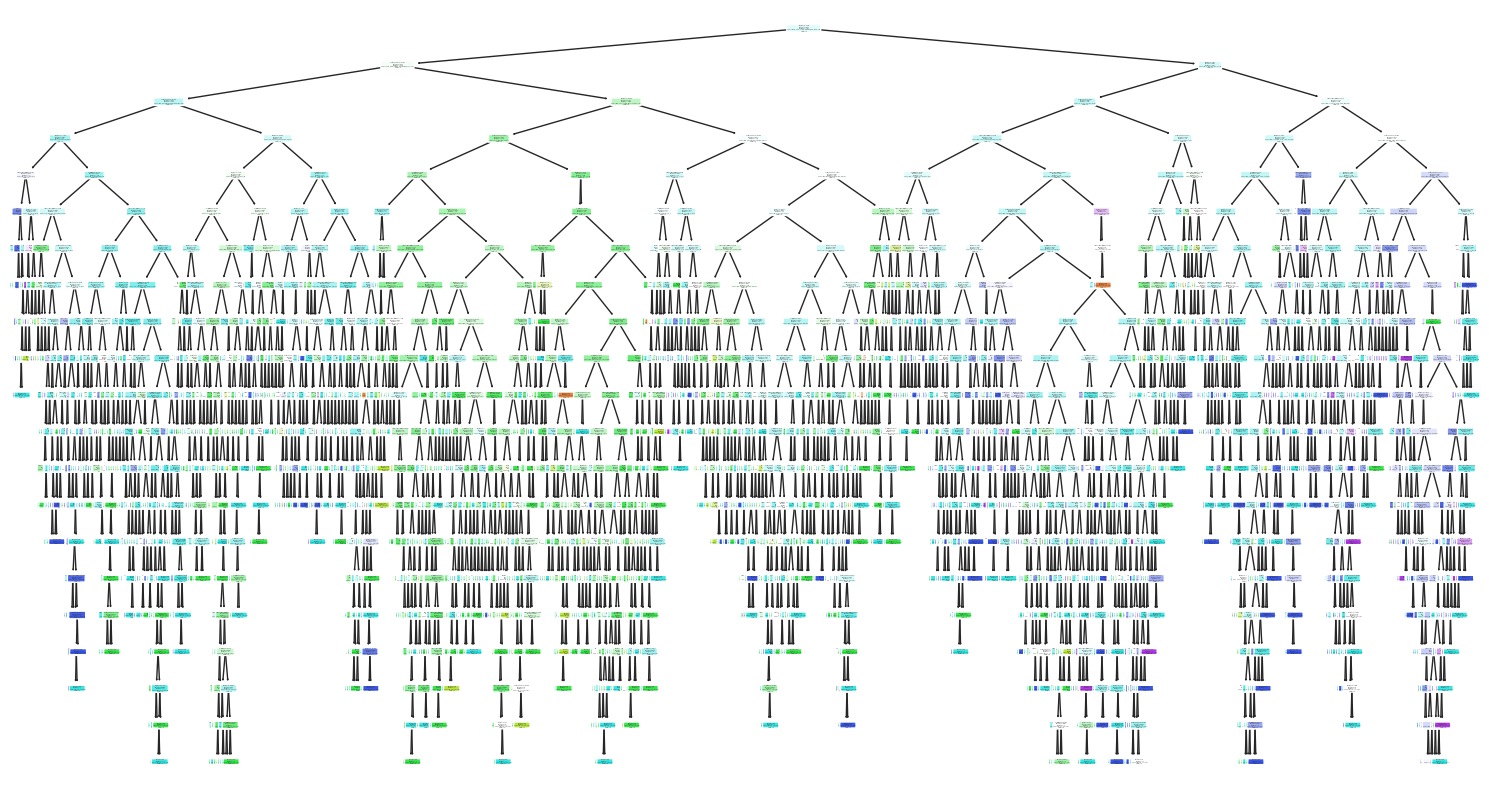

In [25]:
# Antrenăm modelul Decision Tree pe caracteristicile selectate anterior
dt_selected = DecisionTreeClassifier(**grid_search.best_params_, random_state=42)
dt_selected.fit(X_train_selected, y_quality_train)

# Evaluăm performanța
y_pred_dt_selected = dt_selected.predict(X_test_selected)
accuracy_dt_selected = accuracy_score(y_quality_test, y_pred_dt_selected)
f1_dt_selected = f1_score(y_quality_test, y_pred_dt_selected, average='weighted')

print(f"\nRezultate Decision Tree cu caracteristici selectate:")
print(f"Acuratețe: {accuracy_dt_selected:.4f}")
print(f"F1-score (weighted): {f1_dt_selected:.4f}")
print(f"Comparație cu modelul complet: {accuracy_dt_selected - accuracy_dt:.4f} diferență de acuratețe")
print("Caracteristici utilizate:", selected_features.tolist())

# Vizualizăm acest arbore simplificat
plt.figure(figsize=(15, 8))
tree.plot_tree(dt_selected, feature_names=selected_features, filled=True, rounded=True, class_names=[str(i) for i in range(3, 10)])
save_fig('dt_selected_features_tree')
plt.show()

Polynomial regression

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.model_selection import GridSearchCV, learning_curve, KFold, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_regression

# Anunțăm implementarea modelului Polynomial Regression
print("Implementăm Polynomial Regression pentru predicția calității vinului...")

# Convertim variabila target la valori numerice (dacă nu este deja)
y_quality_train_numeric = y_quality_train.astype(float)
y_quality_test_numeric = y_quality_test.astype(float)

# Definim pipeline-ul pentru Polynomial Regression
# Folosim Ridge regression pentru a preveni overfitting
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('ridge_regression', Ridge())
])

# Definim parametrii pentru GridSearchCV
param_grid = {
    'poly_features__degree': [1, 2, 3],  # Gradul polinomial
    'ridge_regression__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],  # Parametrul de regularizare
}

# Inițializăm GridSearchCV
print("Efectuăm căutarea parametrilor optimali...")
start_time = time.time()
grid_search = GridSearchCV(poly_pipeline, param_grid, cv=5,
                          scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train_scaled, y_quality_train_numeric)
end_time = time.time()

# Afișăm rezultatele
print(f"Cea mai bună configurație de parametri: {grid_search.best_params_}")
print(f"Cel mai bun scor (neg_mean_squared_error): {grid_search.best_score_:.4f}")
print(f"Timp total de căutare: {end_time - start_time:.2f} secunde")

# Extragem modelul optim și evaluăm pe setul de test
best_poly = grid_search.best_estimator_
y_pred_poly = best_poly.predict(X_test_scaled)

# Calculăm metricile de performanță
mse = mean_squared_error(y_quality_test_numeric, y_pred_poly)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_quality_test_numeric, y_pred_poly)
r2 = r2_score(y_quality_test_numeric, y_pred_poly)

print(f"\nPerformanța pe setul de test:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

# Pentru comparație cu modelele de clasificare anterioare, discretizăm predicțiile
y_pred_poly_discrete = np.round(y_pred_poly).astype(int)
# Asigurăm că valorile sunt în intervalul valid (3-9)
y_pred_poly_discrete = np.clip(y_pred_poly_discrete, 3, 9)

# Calculăm acuratețea (proporția de predicții exacte)
accuracy_poly = np.mean(y_pred_poly_discrete == y_quality_test)
print(f"\nAcuratețe (după discretizare): {accuracy_poly:.4f}")

Implementăm Polynomial Regression pentru predicția calității vinului...
Efectuăm căutarea parametrilor optimali...
Fitting 5 folds for each of 15 candidates, totalling 75 fits
Cea mai bună configurație de parametri: {'poly_features__degree': 2, 'ridge_regression__alpha': 10.0}
Cel mai bun scor (neg_mean_squared_error): -0.5380
Timp total de căutare: 5.91 secunde

Performanța pe setul de test:
MSE: 0.4996
RMSE: 0.7068
MAE: 0.5536
R² Score: 0.3457

Acuratețe (după discretizare): 0.5385


Saving figure poly_regression_learning_curve_polynomial_regression_(grad=2)


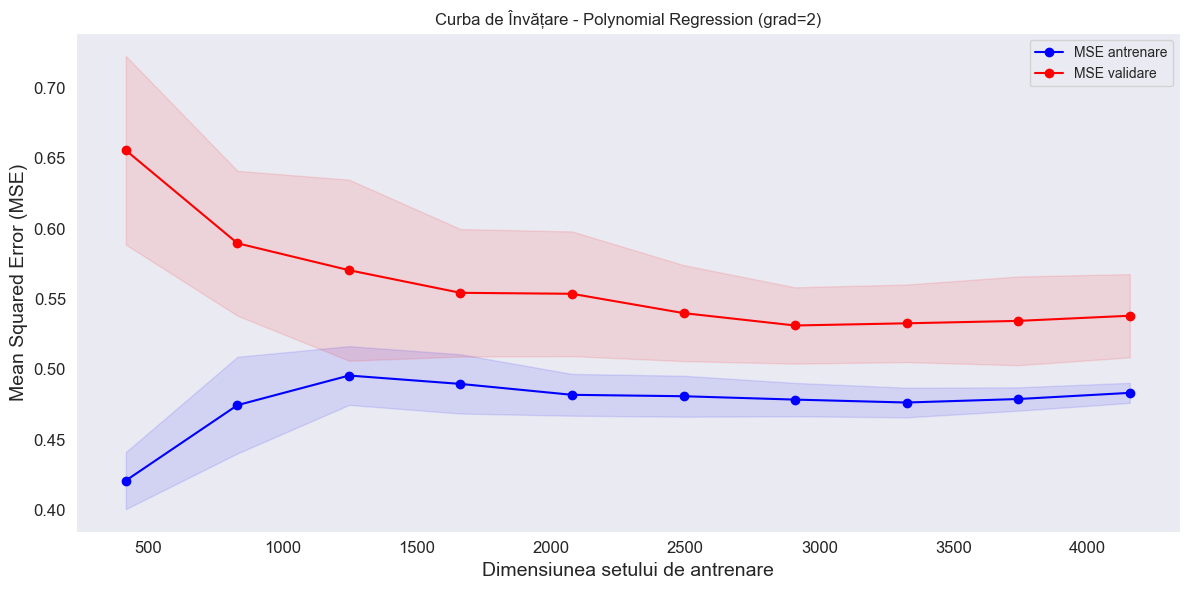

Saving figure poly_regression_actual_vs_predicted


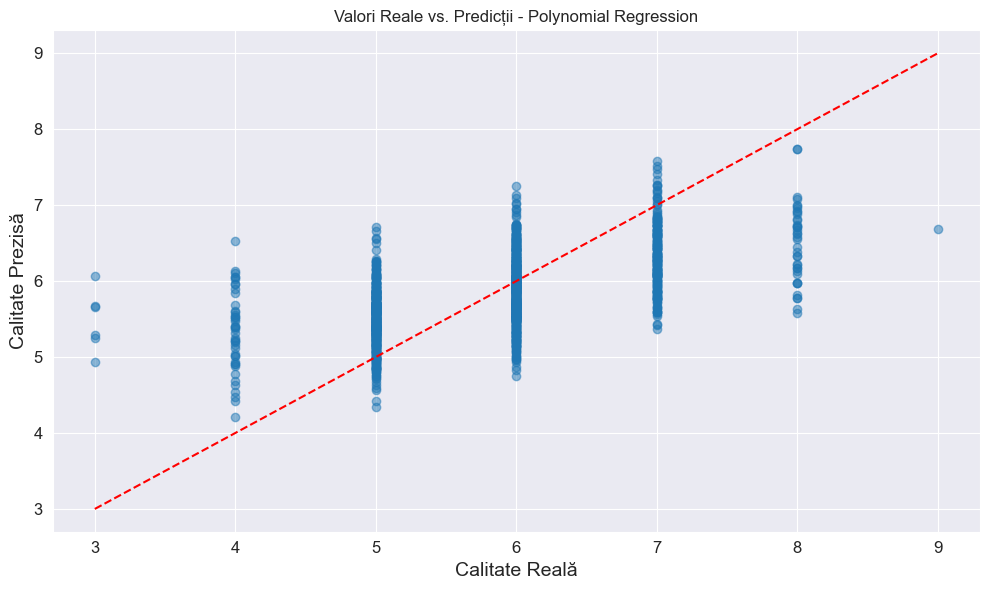

Saving figure poly_regression_error_distribution


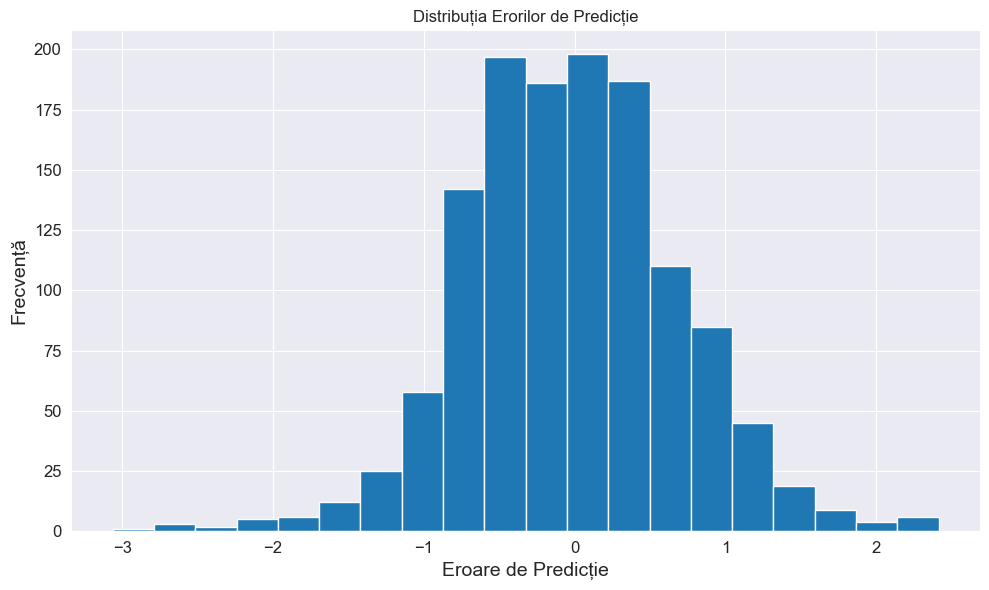

In [27]:
# Definem o funcție pentru plotarea curbelor de învățare
def plot_learning_curves_regression(estimator, X, y, title):
    train_sizes = np.linspace(0.1, 1.0, 10)

    # Calculăm curbele de învățare pentru MSE
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator, X, y, train_sizes=train_sizes, cv=5,
        scoring='neg_mean_squared_error', n_jobs=-1)

    # Convertim scorurile negative la valori pozitive
    train_scores_mse = -train_scores
    validation_scores_mse = -validation_scores

    # Calculăm media și deviația standard
    train_mean = np.mean(train_scores_mse, axis=1)
    train_std = np.std(train_scores_mse, axis=1)
    validation_mean = np.mean(validation_scores_mse, axis=1)
    validation_std = np.std(validation_scores_mse, axis=1)

    # Plotăm curbele de învățare
    plt.figure(figsize=(12, 6))
    plt.title(f'Curba de Învățare - {title}')
    plt.xlabel('Dimensiunea setului de antrenare')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid()

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, validation_mean - validation_std, validation_mean + validation_std, alpha=0.1, color='red')

    plt.plot(train_sizes, train_mean, 'o-', color='blue', label='MSE antrenare')
    plt.plot(train_sizes, validation_mean, 'o-', color='red', label='MSE validare')

    plt.legend(loc='best')
    save_fig(f'poly_regression_learning_curve_{title.replace(" ", "_").lower()}')
    plt.show()

# Plotăm curbele de învățare pentru modelul optim
plot_learning_curves_regression(best_poly, X_train_scaled, y_quality_train_numeric,
                              f"Polynomial Regression (grad={grid_search.best_params_['poly_features__degree']})")

# Plotăm valorile actuale vs. predicții pentru a vizualiza performanța modelului
plt.figure(figsize=(10, 6))
plt.scatter(y_quality_test_numeric, y_pred_poly, alpha=0.5)
plt.plot([3, 9], [3, 9], 'r--')
plt.xlabel('Calitate Reală')
plt.ylabel('Calitate Prezisă')
plt.title('Valori Reale vs. Predicții - Polynomial Regression')
plt.grid(True)
save_fig('poly_regression_actual_vs_predicted')
plt.show()

# Calculăm erorile și le vizualizăm
errors = y_quality_test_numeric - y_pred_poly
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=20)
plt.xlabel('Eroare de Predicție')
plt.ylabel('Frecvență')
plt.title('Distribuția Erorilor de Predicție')
plt.grid(True)
save_fig('poly_regression_error_distribution')
plt.show()


Cele mai importante 5 caracteristici pentru predicția calității:
['fixed acidity', 'volatile acidity', 'chlorides', 'density', 'alcohol']

Performanța cu caracteristici selectate:
MSE: 0.5483
RMSE: 0.7405
MAE: 0.5783
R² Score: 0.2818

Comparație cu modelul complet:
Diferență MSE: 0.0487
Diferență R²: -0.0638
Saving figure poly_regression_feature_relationships


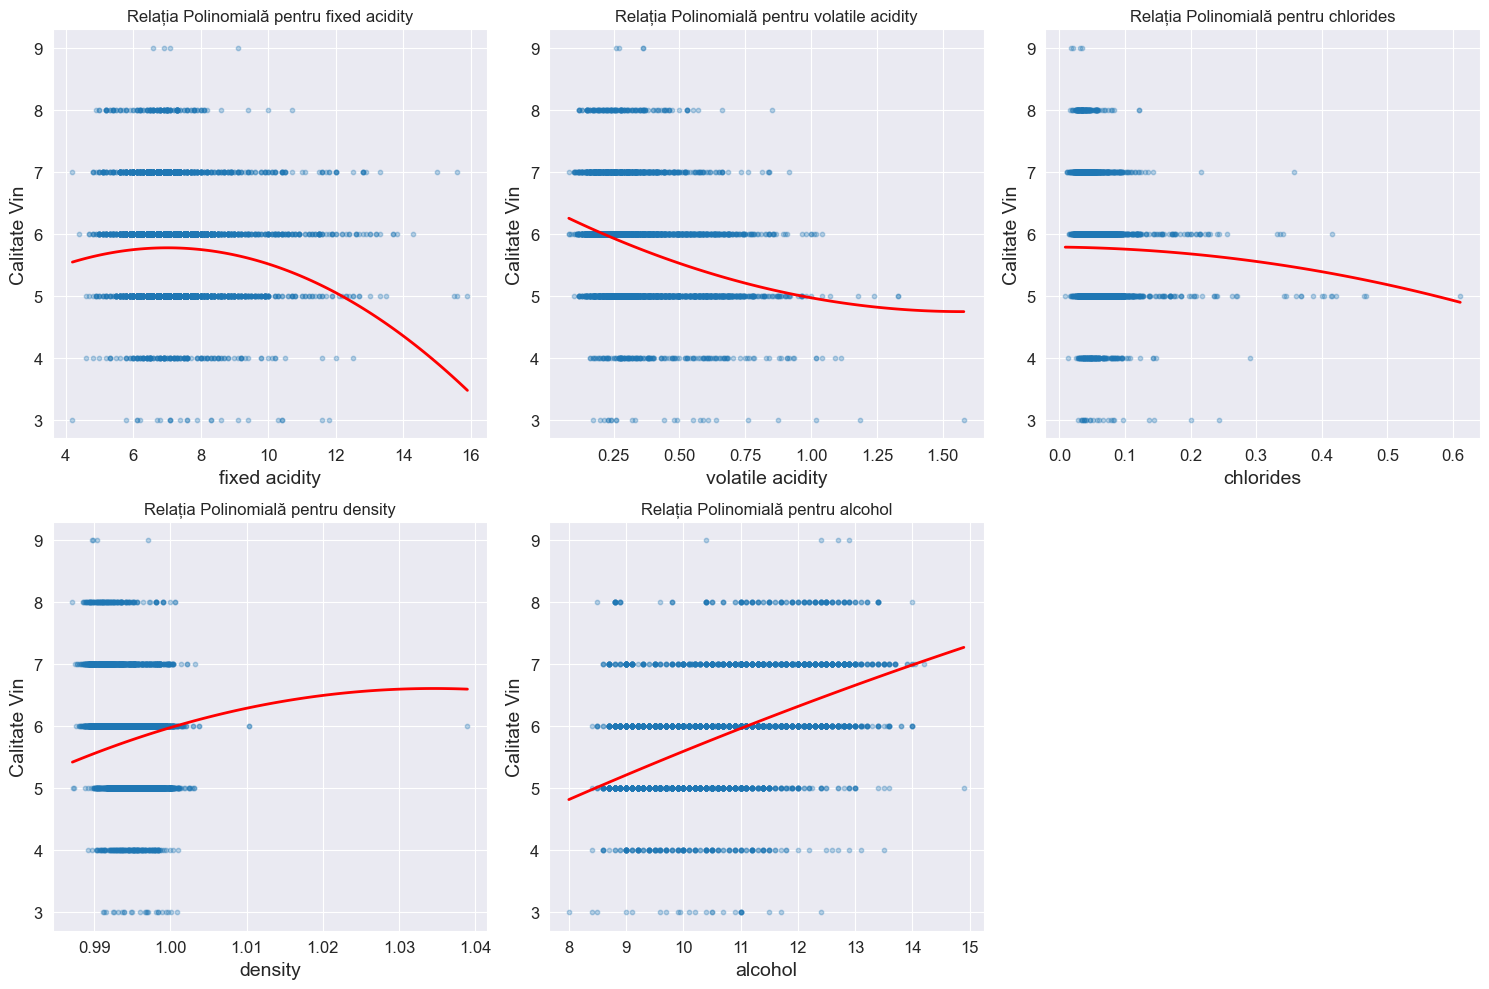

In [28]:
# Analizăm importanța caracteristicilor prin selectarea celor mai bune
# Notă: Pentru Polynomial Regression, interpretarea directă a coeficienților este mai dificilă,
# așa că vom folosi SelectKBest pentru a identifica caracteristicile importante

# Selectăm cele mai importante k caracteristici folosind f_regression
selector = SelectKBest(f_regression, k=5)
X_train_best = selector.fit_transform(X_train_scaled, y_quality_train_numeric)
X_test_best = selector.transform(X_test_scaled)

# Obținem măștile pentru caracteristicile selectate
feature_indices = selector.get_support(indices=True)
selected_features = X.columns[feature_indices]
print("\nCele mai importante 5 caracteristici pentru predicția calității:")
print(selected_features.tolist())

# Antrenăm un nou model pe caracteristicile selectate
best_params = grid_search.best_params_
poly_selected = Pipeline([
    ('poly_features', PolynomialFeatures(degree=best_params['poly_features__degree'])),
    ('ridge_regression', Ridge(alpha=best_params['ridge_regression__alpha']))
])
poly_selected.fit(X_train_best, y_quality_train_numeric)

# Evaluăm performanța
y_pred_selected = poly_selected.predict(X_test_best)
mse_selected = mean_squared_error(y_quality_test_numeric, y_pred_selected)
rmse_selected = np.sqrt(mse_selected)
mae_selected = mean_absolute_error(y_quality_test_numeric, y_pred_selected)
r2_selected = r2_score(y_quality_test_numeric, y_pred_selected)

print(f"\nPerformanța cu caracteristici selectate:")
print(f"MSE: {mse_selected:.4f}")
print(f"RMSE: {rmse_selected:.4f}")
print(f"MAE: {mae_selected:.4f}")
print(f"R² Score: {r2_selected:.4f}")

# Comparăm cu modelul complet
print(f"\nComparație cu modelul complet:")
print(f"Diferență MSE: {mse_selected - mse:.4f}")
print(f"Diferență R²: {r2_selected - r2:.4f}")

# Pentru o mai bună interpretare, vizualizăm relația dintre caracteristicile selectate și calitate
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)

    # Obținem valorile originale pentru caracteristică
    feature_index = list(X.columns).index(feature)
    x_values = X_train.iloc[:, feature_index].values

    # Sortăm valorile pentru a avea un plot mai clar
    idx = np.argsort(x_values)
    sorted_x = x_values[idx]
    sorted_y = y_quality_train_numeric.values[idx]

    # Plotăm valorile reale
    plt.scatter(sorted_x, sorted_y, s=10, alpha=0.3)

    # Creăm un grid de valori pentru a plota curba polinomială
    x_range = np.linspace(min(sorted_x), max(sorted_x), 100).reshape(-1, 1)
    # Standardizăm valorile ca în model
    x_range_scaled = (x_range - X_train.iloc[:, feature_index].mean()) / X_train.iloc[:, feature_index].std()

    # Cream un DataFrame temporar pentru predicție
    temp_X = np.zeros((len(x_range), X_train_best.shape[1]))
    # Setăm valorile pentru caracteristica curentă
    feature_pos_in_selected = np.where(feature_indices == feature_index)[0][0]
    temp_X[:, feature_pos_in_selected] = x_range_scaled.flatten()

    # Facem predicția
    y_pred = poly_selected.predict(temp_X)

    # Plotăm curba de regresie
    plt.plot(x_range, y_pred, 'r-', linewidth=2)
    plt.title(f'Relația Polinomială pentru {feature}')
    plt.xlabel(feature)
    plt.ylabel('Calitate Vin')
    plt.grid(True)

plt.tight_layout()
save_fig('poly_regression_feature_relationships')
plt.show()

Saving figure poly_regression_degree_experiment


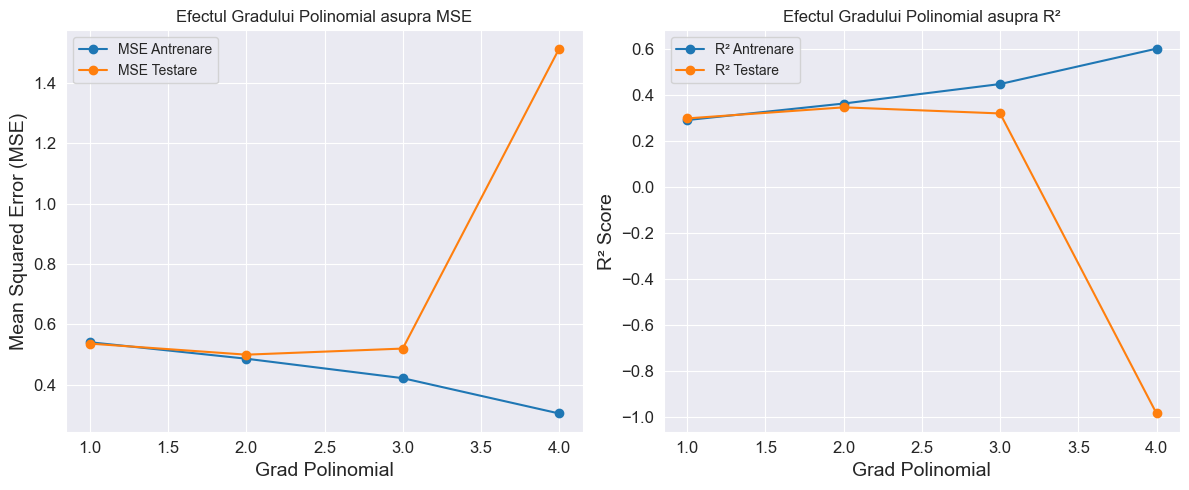

In [29]:
# Experimentăm cu diverse grade polinomiale pentru a vizualiza efectul asupra performanței
degrees = [1, 2, 3, 4]
mse_train = []
mse_test = []
r2_train = []
r2_test = []

for degree in degrees:
    # Creăm model cu gradul specificat
    poly_model = Pipeline([
        ('poly_features', PolynomialFeatures(degree=degree)),
        ('ridge_regression', Ridge(alpha=best_params['ridge_regression__alpha']))
    ])

    # Antrenăm modelul
    poly_model.fit(X_train_scaled, y_quality_train_numeric)

    # Evaluăm pe seturile de antrenare și testare
    y_train_pred = poly_model.predict(X_train_scaled)
    y_test_pred = poly_model.predict(X_test_scaled)

    # Calculăm MSE și R² pentru antrenare și testare
    mse_train.append(mean_squared_error(y_quality_train_numeric, y_train_pred))
    mse_test.append(mean_squared_error(y_quality_test_numeric, y_test_pred))
    r2_train.append(r2_score(y_quality_train_numeric, y_train_pred))
    r2_test.append(r2_score(y_quality_test_numeric, y_test_pred))

# Plotăm rezultatele experimentului
plt.figure(figsize=(12, 5))

# Plot pentru MSE
plt.subplot(1, 2, 1)
plt.plot(degrees, mse_train, 'o-', label='MSE Antrenare')
plt.plot(degrees, mse_test, 'o-', label='MSE Testare')
plt.xlabel('Grad Polinomial')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Efectul Gradului Polinomial asupra MSE')
plt.grid(True)
plt.legend()

# Plot pentru R²
plt.subplot(1, 2, 2)
plt.plot(degrees, r2_train, 'o-', label='R² Antrenare')
plt.plot(degrees, r2_test, 'o-', label='R² Testare')
plt.xlabel('Grad Polinomial')
plt.ylabel('R² Score')
plt.title('Efectul Gradului Polinomial asupra R²')
plt.grid(True)
plt.legend()

plt.tight_layout()
save_fig('poly_regression_degree_experiment')
plt.show()

Ensemble Learning

Implementăm Random Forest pentru predicția calității vinului...
Efectuăm căutarea parametrilor optimali pentru Random Forest...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cea mai bună configurație de parametri: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Cea mai bună acuratețe în timpul validării: 0.6685
Timp total de căutare: 202.46 secunde

Performanța Random Forest pe setul de test:
Acuratețe: 0.6962
Precizie: 0.7005
Recall: 0.6962
F1-score: 0.6851

Raport de clasificare detaliat:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       0.78      0.16      0.27        43
           5       0.75      0.71      0.73       428
           6       0.66      0.80      0.73       567
           7       0.69      0.58      0.63       216
           8       0.82      0.36      0.50        39
           9       0.00      0.00      0.00         1

    accuracy                           0.70      1300
   macro avg       0.53      0.37      0.41      1300
weighted avg       0.70      0.70      0.69      1300



c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

Saving figure rf_wine_quality_confusion_matrix


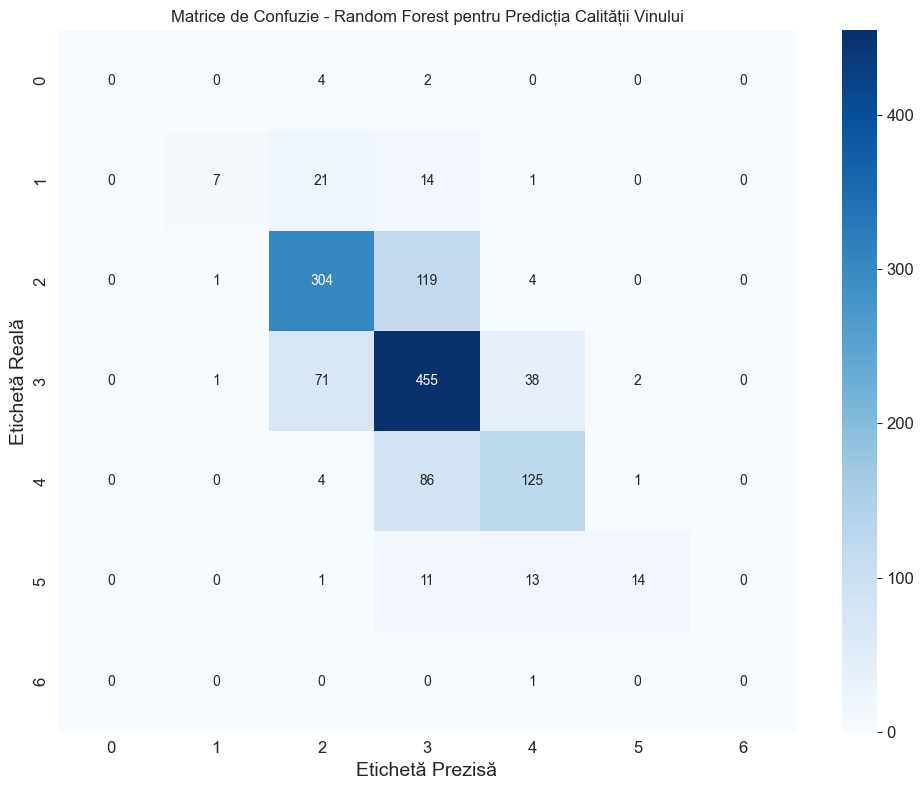

In [30]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve, cross_val_score

# Implementarea Random Forest
print("Implementăm Random Forest pentru predicția calității vinului...")

# Definim parametrii pentru GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2']
}

# Inițializăm modelul Random Forest
rf_clf = RandomForestClassifier(random_state=42)

# Folosim GridSearchCV pentru a găsi cei mai buni hiperparametri
print("Efectuăm căutarea parametrilor optimali pentru Random Forest...")
start_time = time.time()
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_quality_train)
end_time = time.time()

# Afișăm rezultatele
print(f"Cea mai bună configurație de parametri: {grid_search_rf.best_params_}")
print(f"Cea mai bună acuratețe în timpul validării: {grid_search_rf.best_score_:.4f}")
print(f"Timp total de căutare: {end_time - start_time:.2f} secunde")

# Extragem modelul optim și evaluăm pe setul de test
best_rf = grid_search_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test_scaled)

# Calculăm metricile de performanță
accuracy_rf = accuracy_score(y_quality_test, y_pred_rf)
precision_rf = precision_score(y_quality_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_quality_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_quality_test, y_pred_rf, average='weighted')

print(f"\nPerformanța Random Forest pe setul de test:")
print(f"Acuratețe: {accuracy_rf:.4f}")
print(f"Precizie: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1-score: {f1_rf:.4f}")
print("\nRaport de clasificare detaliat:")
print(classification_report(y_quality_test, y_pred_rf))

# Afișăm matricea de confuzie
plt.figure(figsize=(10, 8))
cm_rf = confusion_matrix(y_quality_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues")
plt.title('Matrice de Confuzie - Random Forest pentru Predicția Calității Vinului')
plt.ylabel('Etichetă Reală')
plt.xlabel('Etichetă Prezisă')
save_fig('rf_wine_quality_confusion_matrix')
plt.show()

Saving figure rf_feature_importance


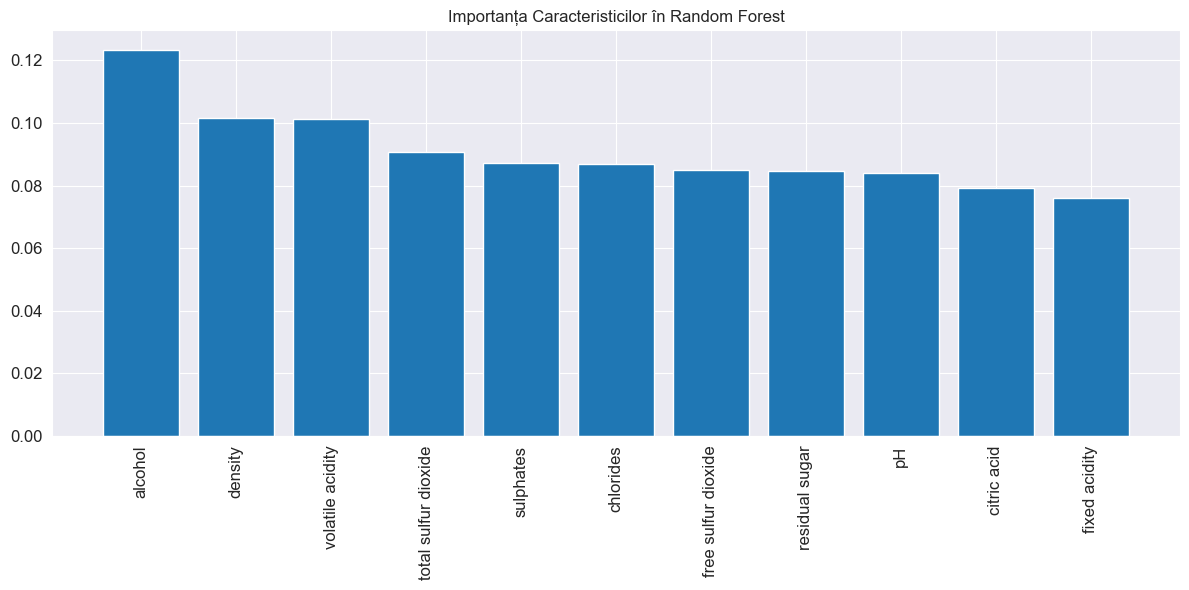

Saving figure rf_n_estimators_effect


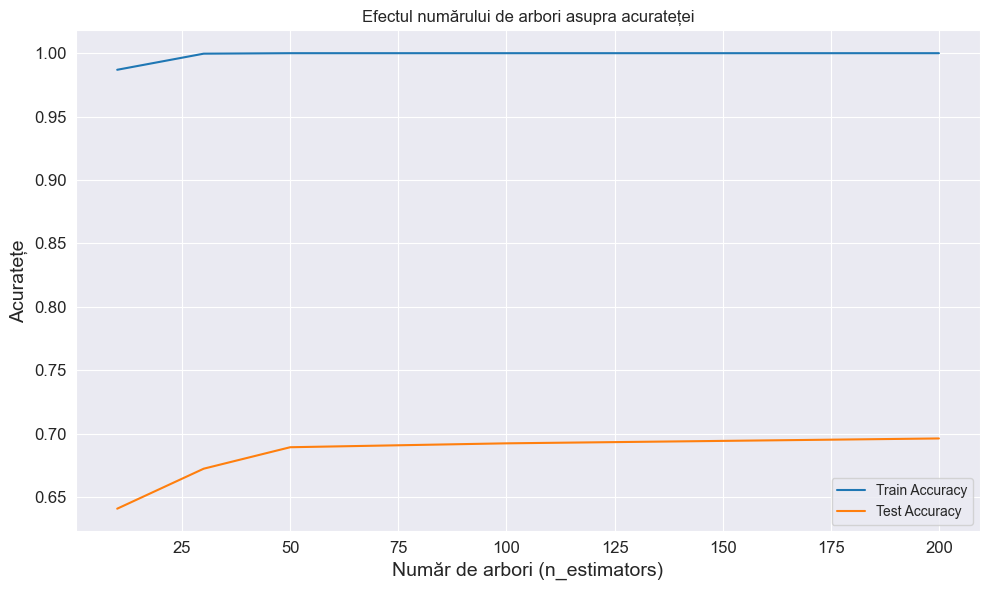

In [31]:
# Vizualizarea importanței caracteristicilor pentru Random Forest
plt.figure(figsize=(12, 6))
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X.columns

plt.title('Importanța Caracteristicilor în Random Forest')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
save_fig('rf_feature_importance')
plt.show()

# Evaluarea efectului numărului de arbori asupra performanței
n_estimators_range = [10, 30, 50, 100, 200]
train_accuracy = []
test_accuracy = []

for n_estimators in n_estimators_range:
    model = RandomForestClassifier(n_estimators=n_estimators, random_state=42,
                                   max_depth=grid_search_rf.best_params_['max_depth'],
                                   min_samples_split=grid_search_rf.best_params_['min_samples_split'],
                                   min_samples_leaf=grid_search_rf.best_params_['min_samples_leaf'],
                                   max_features=grid_search_rf.best_params_['max_features'])

    model.fit(X_train_scaled, y_quality_train)
    train_accuracy.append(accuracy_score(y_quality_train, model.predict(X_train_scaled)))
    test_accuracy.append(accuracy_score(y_quality_test, model.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_accuracy, label='Train Accuracy')
plt.plot(n_estimators_range, test_accuracy, label='Test Accuracy')
plt.xlabel('Număr de arbori (n_estimators)')
plt.ylabel('Acuratețe')
plt.title('Efectul numărului de arbori asupra acurateței')
plt.legend()
plt.grid(True)
save_fig('rf_n_estimators_effect')
plt.show()

In [36]:
# Implementăm AdaBoost pentru predicția calității vinului
print("Implementăm AdaBoost pentru predicția calității vinului...")

# Definim parametrii pentru GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'estimator__max_depth': [1, 2, 3]  # Decision stumps și arbori puțin mai profunzi
}

# Inițializăm modelul AdaBoost cu un arbore de decizie ca estimator de bază
base_estimator = DecisionTreeClassifier(random_state=42)
ada_clf = AdaBoostClassifier(estimator=base_estimator, random_state=42)

# Folosim GridSearchCV pentru a găsi cei mai buni hiperparametri
print("Efectuăm căutarea parametrilor optimali pentru AdaBoost...")
start_time = time.time()
grid_search_ada = GridSearchCV(ada_clf, param_grid_ada, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_ada.fit(X_train_scaled, y_quality_train)
end_time = time.time()

# Afișăm rezultatele
print(f"Cea mai bună configurație de parametri: {grid_search_ada.best_params_}")
print(f"Cea mai bună acuratețe în timpul validării: {grid_search_ada.best_score_:.4f}")
print(f"Timp total de căutare: {end_time - start_time:.2f} secunde")

# Extragem modelul optim și evaluăm pe setul de test
best_ada = grid_search_ada.best_estimator_
y_pred_ada = best_ada.predict(X_test_scaled)

# Calculăm metricile de performanță
accuracy_ada = accuracy_score(y_quality_test, y_pred_ada)
precision_ada = precision_score(y_quality_test, y_pred_ada, average='weighted')
recall_ada = recall_score(y_quality_test, y_pred_ada, average='weighted')
f1_ada = f1_score(y_quality_test, y_pred_ada, average='weighted')

print(f"\nPerformanța AdaBoost pe setul de test:")
print(f"Acuratețe: {accuracy_ada:.4f}")
print(f"Precizie: {precision_ada:.4f}")
print(f"Recall: {recall_ada:.4f}")
print(f"F1-score: {f1_ada:.4f}")
print("\nRaport de clasificare detaliat:")
print(classification_report(y_quality_test, y_pred_ada))

Implementăm AdaBoost pentru predicția calității vinului...
Efectuăm căutarea parametrilor optimali pentru AdaBoost...
Fitting 5 folds for each of 27 candidates, totalling 135 fits


c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\model_selection\_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cea mai bună configurație de parametri: {'estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Cea mai bună acuratețe în timpul validării: 0.5497
Timp total de căutare: 67.69 secunde

Performanța AdaBoost pe setul de test:
Acuratețe: 0.5462
Precizie: 0.5388
Recall: 0.5462
F1-score: 0.5212

Raport de clasificare detaliat:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         6
           4       1.00      0.02      0.05        43
           5       0.61      0.60      0.60       428
           6       0.53      0.68      0.59       567
           7       0.45      0.31      0.37       216
           8       0.00      0.00      0.00        39
           9       0.00      0.00      0.00         1

    accuracy                           0.55      1300
   macro avg       0.37      0.23      0.23      1300
weighted avg       0.54      0.55      0.52      1300



c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexc\anaconda3\envs\env_si\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\U

Saving figure adaboost_learning_rate_effect


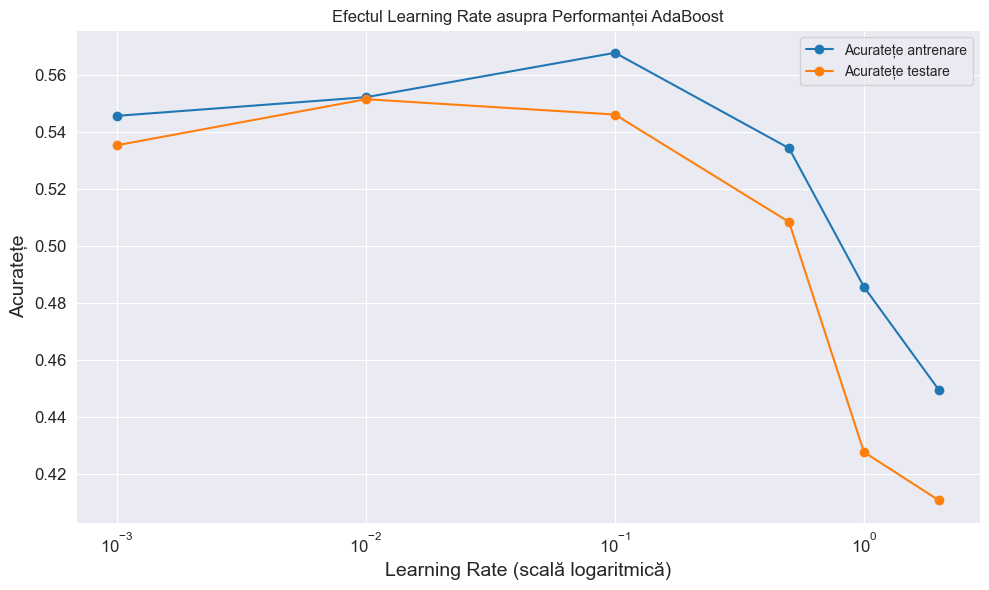

Saving figure adaboost_estimators_curve


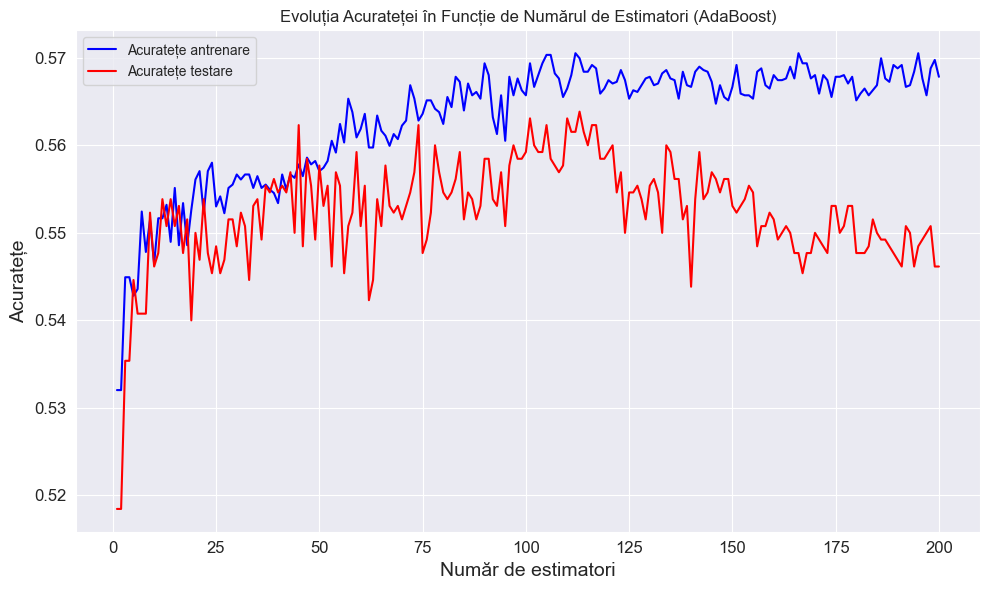

In [39]:
# Analizăm efectul learning rate-ului asupra performanței AdaBoost
learning_rates = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]
train_scores = []
test_scores = []

for lr in learning_rates:
    ada = AdaBoostClassifier(
        estimator=DecisionTreeClassifier(
            max_depth=grid_search_ada.best_params_['estimator__max_depth'],
            random_state=42
        ),
        n_estimators=grid_search_ada.best_params_['n_estimators'],
        learning_rate=lr,
        random_state=42
    )

    ada.fit(X_train_scaled, y_quality_train)

    y_train_pred = ada.predict(X_train_scaled)
    y_test_pred = ada.predict(X_test_scaled)

    train_scores.append(accuracy_score(y_quality_train, y_train_pred))
    test_scores.append(accuracy_score(y_quality_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.semilogx(learning_rates, train_scores, 'o-', label='Acuratețe antrenare')
plt.semilogx(learning_rates, test_scores, 'o-', label='Acuratețe testare')
plt.xlabel('Learning Rate (scală logaritmică)')
plt.ylabel('Acuratețe')
plt.title('Efectul Learning Rate asupra Performanței AdaBoost')
plt.legend()
plt.grid(True)
save_fig('adaboost_learning_rate_effect')
plt.show()

# Plotăm curba de antrenare pentru a observa evoluția accurateței în funcție de numărul de estimatori
n_estimators = grid_search_ada.best_params_['n_estimators']
learning_rate = grid_search_ada.best_params_['learning_rate']
max_depth = grid_search_ada.best_params_['estimator__max_depth']

ada_staged = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=max_depth, random_state=42),
    n_estimators=n_estimators,
    learning_rate=learning_rate,
    random_state=42
)

ada_staged.fit(X_train_scaled, y_quality_train)

# Obținem acuratețea pentru fiecare etapă de antrenare
train_scores_staged = [accuracy_score(y_quality_train, y_pred) for y_pred in ada_staged.staged_predict(X_train_scaled)]
test_scores_staged = [accuracy_score(y_quality_test, y_pred) for y_pred in ada_staged.staged_predict(X_test_scaled)]

plt.figure(figsize=(10, 6))
plt.plot(range(1, n_estimators + 1), train_scores_staged, 'b-', label='Acuratețe antrenare')
plt.plot(range(1, n_estimators + 1), test_scores_staged, 'r-', label='Acuratețe testare')
plt.xlabel('Număr de estimatori')
plt.ylabel('Acuratețe')
plt.title('Evoluția Acurateței în Funcție de Numărul de Estimatori (AdaBoost)')
plt.legend()
plt.grid(True)
save_fig('adaboost_estimators_curve')
plt.show()